# Importing Library

In [1]:
# Library
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import scipy
from scipy.stats import zscore

#sklearn 
import sklearn
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score,mean_squared_error, mean_absolute_error

#models
from sklearn.tree import DecisionTreeRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.svm import SVR

# Ensamble models
from sklearn.ensemble import RandomForestRegressor,GradientBoostingRegressor,BaggingRegressor

# Bagging Regressor
from sklearn.ensemble import AdaBoostRegressor, ExtraTreesRegressor
from sklearn.linear_model import SGDRegressor

#neural networks
from sklearn.neural_network import MLPRegressor

#warnings
import warnings
warnings.filterwarnings("ignore")

In [2]:
df=pd.read_csv("carData.csv")

In [3]:
pd.set_option("display.max_rows",None)
pd.set_option("display.max_columns",None)
df=pd.DataFrame(data=df)

In [4]:
df.head(5)

Unnamed: 0.1  Unnamed: 0   Brand    Model         Varient  Make_Year  \
0             0           0  Maruti    Swift  ZXI+ DUAL TONE       2021   
1             1           1  Maruti  Celerio      VXI MANUAL       2017   
2             2           2  Maruti    Swift      VXI MANUAL       2015   
3             3           3  Maruti    Swift      VXI MANUAL       2020   
4             4           4  Nissan  MAGNITE       XE 1.0 MT       2021   

   Kilometer Fuel_Type     Owners Location      Price  
0  37,089 km    Petrol  1st Owner    GJ-27   9,08,299  
1  93,472 km    Petrol  1st Owner    GJ-06   3,94,699  
2  43,828 km    Petrol  1st Owner    RJ-14   4,28,999  
3  17,554 km    Petrol  1st Owner    GJ-06   6,57,899  
4  17,653 km    Petrol  1st Owner    GJ-01   6,03,199

In [5]:
df.tail(5)

Unnamed: 0.1  Unnamed: 0    Brand   Model  \
5224          5224         906  Renault  Duster   
5225          5225         907  Renault  Duster   
5226          5226         908  Renault  Duster   
5227          5227         909   Maruti   Swift   
5228          5228         910  Hyundai     i10   

                                Varient  Make_Year    Kilometer Fuel_Type  \
5224  85 PS RXE DIESEL ADVENTURE MANUAL       2015    55,669 km    Diesel   
5225                   85 PS RXE MANUAL       2014  1,59,926 km    Diesel   
5226  85 PS RXE DIESEL ADVENTURE MANUAL       2015    65,308 km    Diesel   
5227                         VXI MANUAL       2013    60,782 km    Petrol   
5228             MAGNA 1.1 IRDE2 MANUAL       2013    35,164 km    Petrol   

         Owners Location      Price  
5224  1st Owner    DL-1C   4,67,699  
5225  1st Owner    DL-8C   3,61,499  
5226  1st Owner    DL-8C   4,56,599  
5227  2nd Owner    DL-1C   3,50,999  
5228  3rd Owner    DL-9C   2,32,999

In [6]:
df.shape

(5229, 11)

In [7]:
#dropped the meaningless columns.
df.drop(['Unnamed: 0.1','Unnamed: 0'],axis=1,inplace=True)

In [8]:
df.head(5)

Brand    Model         Varient  Make_Year  Kilometer Fuel_Type     Owners  \
0  Maruti    Swift  ZXI+ DUAL TONE       2021  37,089 km    Petrol  1st Owner   
1  Maruti  Celerio      VXI MANUAL       2017  93,472 km    Petrol  1st Owner   
2  Maruti    Swift      VXI MANUAL       2015  43,828 km    Petrol  1st Owner   
3  Maruti    Swift      VXI MANUAL       2020  17,554 km    Petrol  1st Owner   
4  Nissan  MAGNITE       XE 1.0 MT       2021  17,653 km    Petrol  1st Owner   

  Location      Price  
0    GJ-27   9,08,299  
1    GJ-06   3,94,699  
2    RJ-14   4,28,999  
3    GJ-06   6,57,899  
4    GJ-01   6,03,199

In [9]:
df.tail(5)

Brand   Model                            Varient  Make_Year  \
5224  Renault  Duster  85 PS RXE DIESEL ADVENTURE MANUAL       2015   
5225  Renault  Duster                   85 PS RXE MANUAL       2014   
5226  Renault  Duster  85 PS RXE DIESEL ADVENTURE MANUAL       2015   
5227   Maruti   Swift                         VXI MANUAL       2013   
5228  Hyundai     i10             MAGNA 1.1 IRDE2 MANUAL       2013   

        Kilometer Fuel_Type     Owners Location      Price  
5224    55,669 km    Diesel  1st Owner    DL-1C   4,67,699  
5225  1,59,926 km    Diesel  1st Owner    DL-8C   3,61,499  
5226    65,308 km    Diesel  1st Owner    DL-8C   4,56,599  
5227    60,782 km    Petrol  2nd Owner    DL-1C   3,50,999  
5228    35,164 km    Petrol  3rd Owner    DL-9C   2,32,999

In [10]:
df.shape

(5229, 9)

In [11]:
df.size

47061

In [12]:
df.columns

Index(['Brand', 'Model', 'Varient', 'Make_Year', 'Kilometer', 'Fuel_Type',
       'Owners', 'Location', 'Price'],
      dtype='object')

## Know the Columns:

1. Brand- Determine the Brand Name.
2. Model- Model name of the Brand which is used by a manufacturer to market the cars
3. Varient - The car variant is the different variations of car models.
4. Make_Year - Make Year of Manufacture.
5. Kilometer - Kilometer Travelled.
6. Fuel_Type - A fuel is any material that can be made to react.
7. Owner - Number of Cars Owners
8. Location- Car Registration State.
9. Price - Target variable, determines the price of the car.

In [13]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5229 entries, 0 to 5228
Data columns (total 9 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   Brand      5229 non-null   object
 1   Model      5229 non-null   object
 2   Varient    5229 non-null   object
 3   Make_Year  5229 non-null   int64 
 4   Kilometer  5229 non-null   object
 5   Fuel_Type  5229 non-null   object
 6   Owners     5229 non-null   object
 7   Location   5229 non-null   object
 8   Price      5229 non-null   object
dtypes: int64(1), object(8)
memory usage: 367.8+ KB


- NOTE:

1. One Integer Column
2. Eight Object Columns
3. Null Float Columns
4. Memory Used 388 KB

- Target variable shows Price as object

In [14]:
#changing target variable to int
df["Price"]= [int(i.replace(",","")) for i in df['Price']]

In [15]:
df.head(5)

Brand    Model         Varient  Make_Year  Kilometer Fuel_Type     Owners  \
0  Maruti    Swift  ZXI+ DUAL TONE       2021  37,089 km    Petrol  1st Owner   
1  Maruti  Celerio      VXI MANUAL       2017  93,472 km    Petrol  1st Owner   
2  Maruti    Swift      VXI MANUAL       2015  43,828 km    Petrol  1st Owner   
3  Maruti    Swift      VXI MANUAL       2020  17,554 km    Petrol  1st Owner   
4  Nissan  MAGNITE       XE 1.0 MT       2021  17,653 km    Petrol  1st Owner   

  Location   Price  
0    GJ-27  908299  
1    GJ-06  394699  
2    RJ-14  428999  
3    GJ-06  657899  
4    GJ-01  603199

In [16]:
# replace str to int
df['Kilometer']=[str(i.replace("km","")) for i in df['Kilometer']]
df['Kilometer']=[int(i.replace(",","")) for i in df['Kilometer']]

In [17]:
df.head(5)

Brand    Model         Varient  Make_Year  Kilometer Fuel_Type     Owners  \
0  Maruti    Swift  ZXI+ DUAL TONE       2021      37089    Petrol  1st Owner   
1  Maruti  Celerio      VXI MANUAL       2017      93472    Petrol  1st Owner   
2  Maruti    Swift      VXI MANUAL       2015      43828    Petrol  1st Owner   
3  Maruti    Swift      VXI MANUAL       2020      17554    Petrol  1st Owner   
4  Nissan  MAGNITE       XE 1.0 MT       2021      17653    Petrol  1st Owner   

  Location   Price  
0    GJ-27  908299  
1    GJ-06  394699  
2    RJ-14  428999  
3    GJ-06  657899  
4    GJ-01  603199

# Unique Values

In [18]:
for i in df.columns:
    if df[i].dtype=="object":
        print("COLUMN NAME", i)
        print(df[i].unique())
        print("*****"*10)

COLUMN NAME Brand
['Maruti' 'Nissan' 'Renault' 'Tata' 'Mahindra' 'Volkswagen' 'Hyundai'
 'Datsun' 'Kia' 'Skoda' 'Jeep' 'Ford' 'Honda' 'Mg' 'Toyota'
 'Mercedes Benz' 'Fiat' 'Audi' 'Bmw']
**************************************************
COLUMN NAME Model
['Swift' 'Celerio' 'MAGNITE' 'Kwid' 'Baleno' 'Safari' 'Kiger' 'XUV500'
 'Thar' 'Polo' 'i10' 'Redi' 'AURA' 'SELTOS' 'Octavia' 'NEW' 'Compass'
 'KUSHAQ' 'Ecosport' 'Grand' 'Amaze' 'Creta' 'Eeco' 'T-ROC' 'Xcent'
 'HECTOR' 'Tiago' 'XUV' 'Harrier' 'City' 'VENUE' 'NEXON' 'New' 'Civic'
 'Rapid' 'Jazz' 'Verna' 'Elite' 'S' 'Dzire' 'Vitara' 'GRAND' 'i20' 'Alto'
 'Vento' 'Glanza' 'Wagon' 'ALTROZ' 'IGNIS' 'WR-V' 'Ciaz' 'Endeavour'
 'FREESTYLE' 'XL6' 'YARIS' 'Ertiga' 'CRV' 'Figo' 'A' 'Santro' 'TIGOR'
 'Duster' 'Ritz' 'Brio' 'TUV300' 'Eon' 'Zest' 'Kuv100' 'TRIBER' 'Corolla'
 'SONET' 'Etios' 'Captur' 'URBAN' 'MARAZZO' 'Hexa' 'Micra' 'Manza'
 'Terrano' 'BR-V' 'Fortuner' 'Benz' 'Sunny' 'Tucson' 'ASTOR' 'Zen'
 'CARENS' 'Scorpio' 'Go' 'Q5' 'KUV' 'TIGUAN'

In [19]:
for i in df.columns:
    if df[i].dtype=='int64':
        print("COLUMN NAME",i)
        print(df[i].unique())
        print("*****"*10)

COLUMN NAME Make_Year
[2021 2017 2015 2020 2022 2018 2014 2019 2016 2013 2012 2010 2011 2009]
**************************************************
COLUMN NAME Kilometer
[37089 93472 43828 ... 54685 23179 31300]
**************************************************
COLUMN NAME Price
[908299 394699 428999 ... 228899 159099 662699]
**************************************************


### OBSERVATION FOR UNIQUE

- NO NAN VALUES

# Checking Duplicated Rows

In [20]:
df.duplicated().sum()

1978

In [21]:
# first Match
df[df.duplicated(keep='first')].shape[0]

1978

In [22]:
# second Match
df[df.duplicated(keep='last')].shape[0]

1978

In [23]:
df.drop_duplicates(inplace=True)
df.duplicated().sum()

0

### Observations:

- Observation Shows Duplicated Rows.
- row 1978, 1978 are quite similar

# Null Values

In [24]:
# Total null values
missing_value=df.isnull().sum()

# Missing Percentage
missing_percentage=df.isnull().sum()/df.shape[0]*100

view=pd.DataFrame(data={"Missing Values":missing_value,"Missing Percentage":missing_percentage},index=None)
view

Missing Values  Missing Percentage
Brand                   0                 0.0
Model                   0                 0.0
Varient                 0                 0.0
Make_Year               0                 0.0
Kilometer               0                 0.0
Fuel_Type               0                 0.0
Owners                  0                 0.0
Location                0                 0.0
Price                   0                 0.0

## Visualization Null Values

<AxesSubplot:>

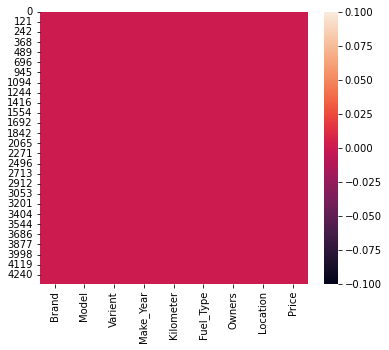

In [25]:
plt.figure(figsize=(6,5))
sns.heatmap(df.isnull())

### Observation

- Rows Shows No null DATA 

# Feature Engineering:

In [26]:
# column shows first two letter
df['State']=df['Location'].str[:2]

In [27]:
# New column Shows first three letter
df['Owners']=df['Owners'].str[:1]

In [28]:
# dropping the old as new column created
df.drop(['Location'],inplace=True,axis=1)

In [29]:
df.head(2)

Brand    Model         Varient  Make_Year  Kilometer Fuel_Type Owners  \
0  Maruti    Swift  ZXI+ DUAL TONE       2021      37089    Petrol      1   
1  Maruti  Celerio      VXI MANUAL       2017      93472    Petrol      1   

    Price State  
0  908299    GJ  
1  394699    GJ

# EDA("Exploratory Data Analysis")

## Univariate Analysis

Maruti     1291
Hyundai     780
Honda       236
Renault     178
Tata        158
Name: Brand, dtype: int64 
 ****************************************
Alto      248
Swift     229
Baleno    194
Grand     161
Wagon     132
Name: Model, dtype: int64 
 ****************************************
VXI MANUAL                      331
LXI MANUAL                      162
DELTA 1.2 K12 MANUAL             97
SPORTZ 1.2 KAPPA VTVT MANUAL     64
VXI AMT AUTOMATIC                48
Name: Varient, dtype: int64 
 ****************************************
2018    574
2019    514
2017    431
2020    405
2021    372
Name: Make_Year, dtype: int64 
 ****************************************
40364    3
45067    3
36314    3
31816    2
53789    2
Name: Kilometer, dtype: int64 
 ****************************************
Petrol          2603
Diesel           528
Petrol + CNG     120
Name: Fuel_Type, dtype: int64 
 ****************************************
1    2515
2     676
3      59
4       1
Name: Owners, dtype: int

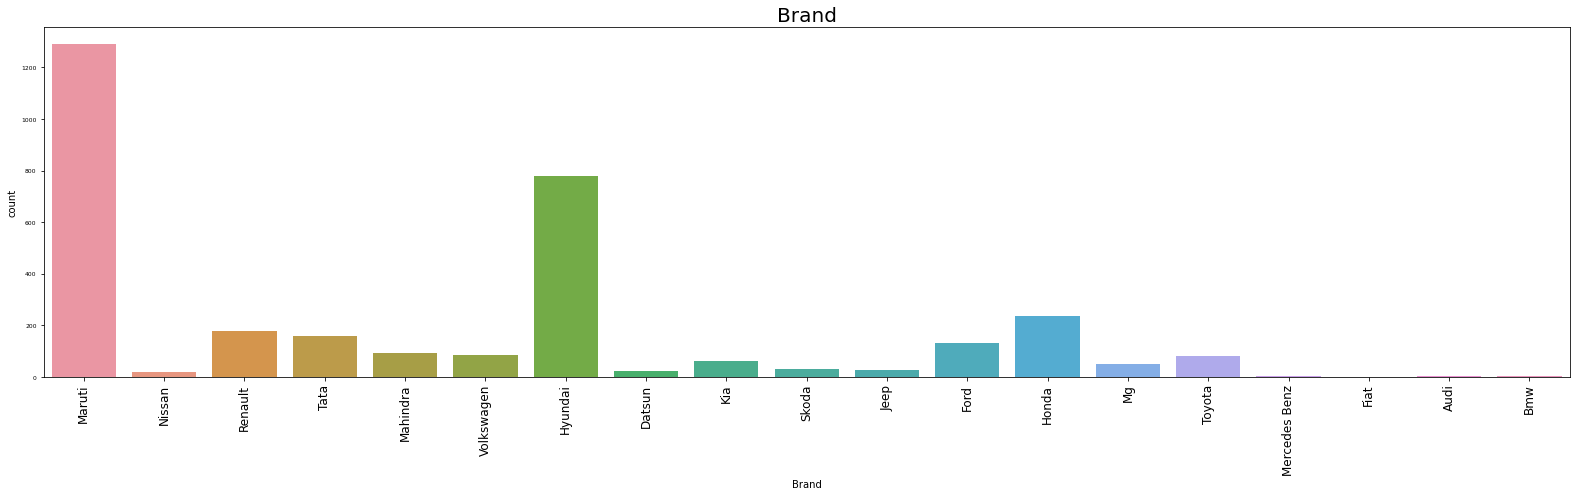

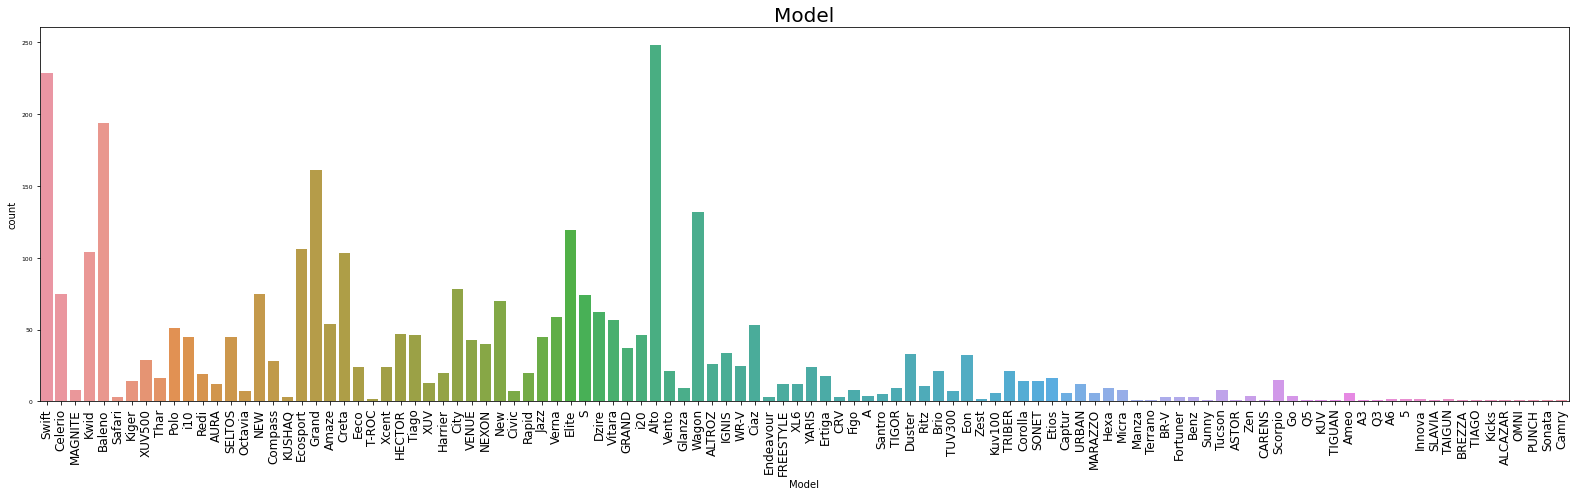

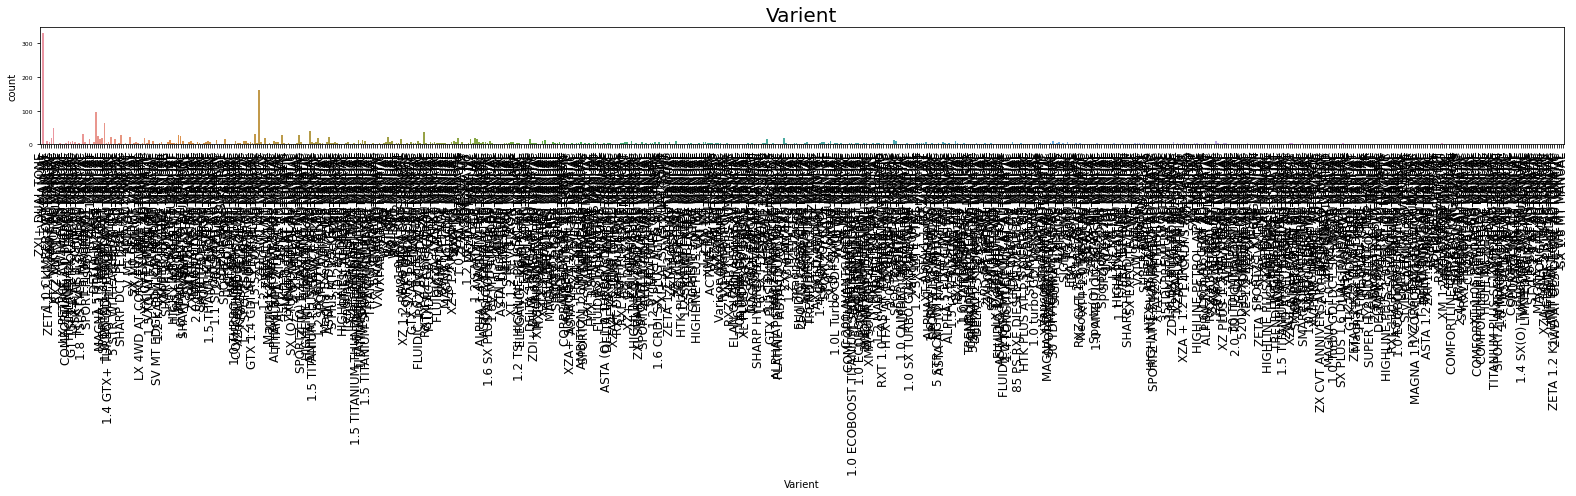

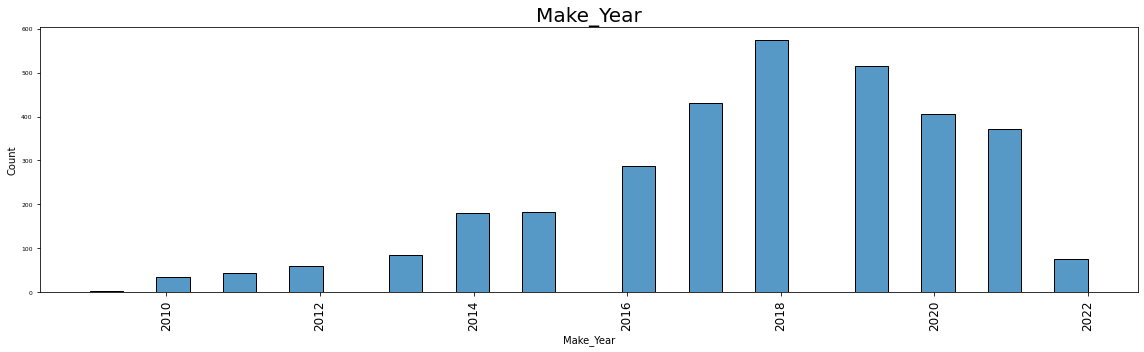

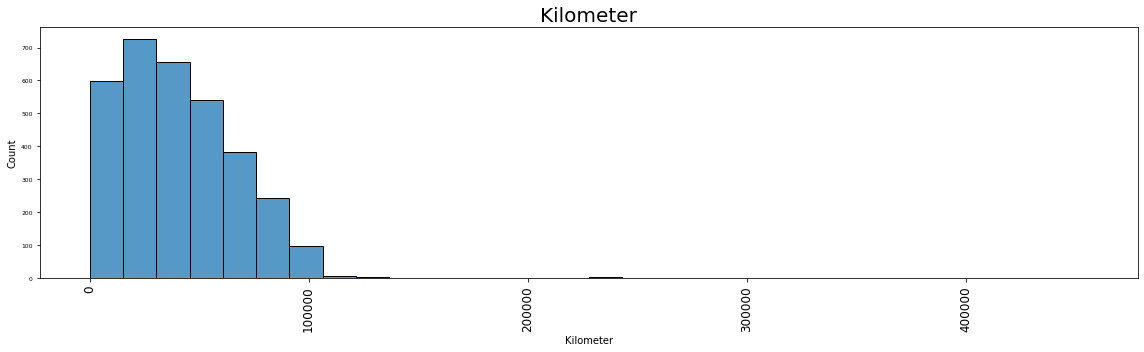

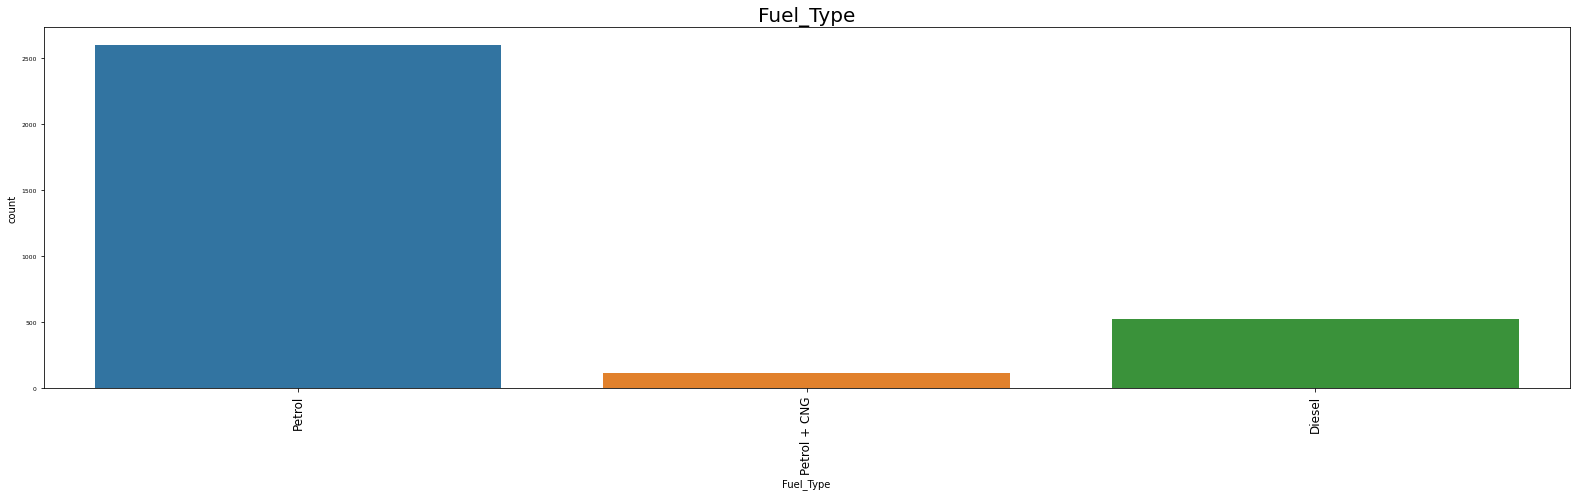

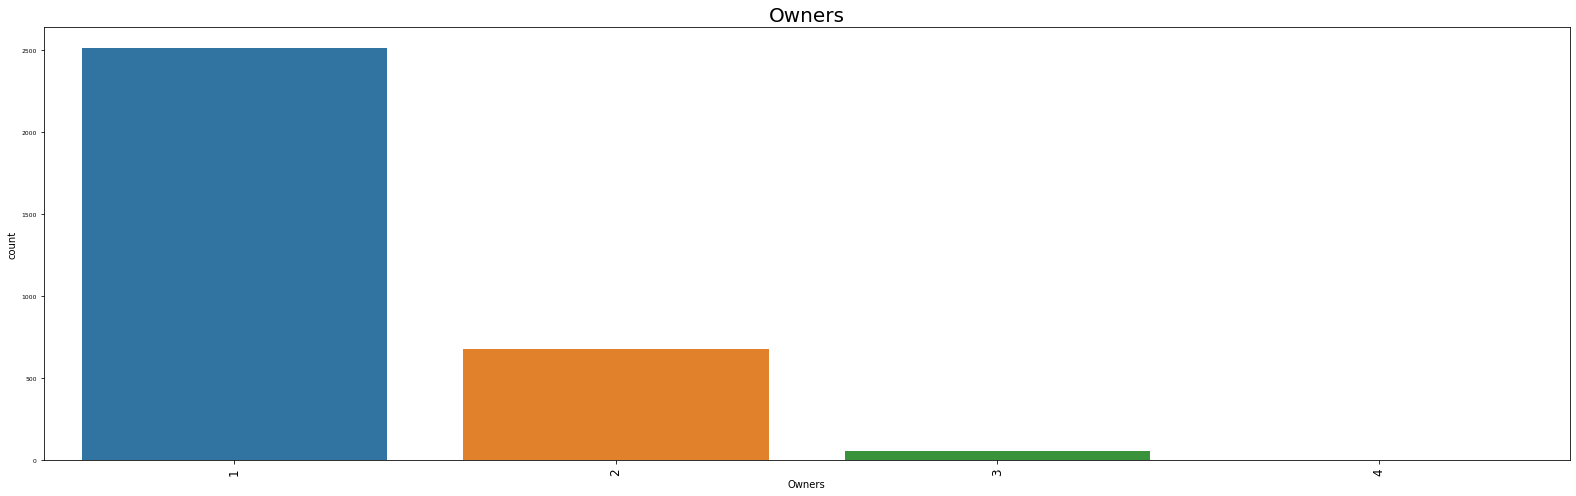

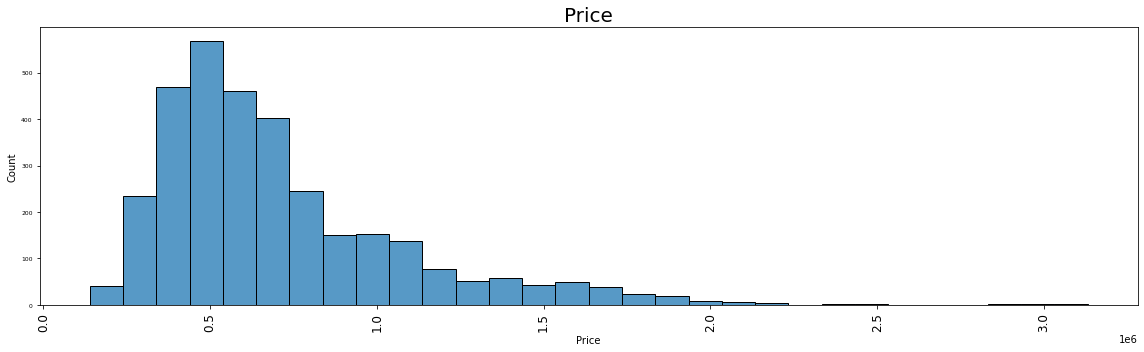

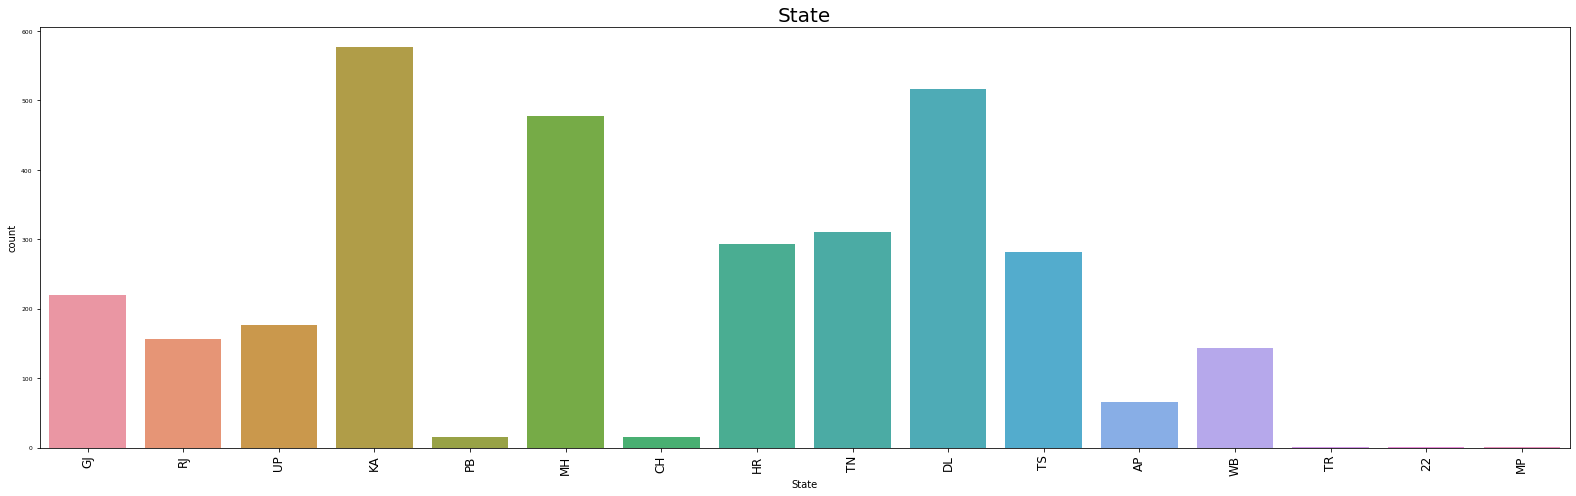

In [30]:
for i in df.columns:
    if df[i].dtype=="object":
        plt.figure(figsize=(22,7))
        plt.title(i,fontsize=20)
        print(df[i].value_counts()[:5],"\n","****"*10)
        sns.countplot(x=i,data=df)
        plt.xticks(rotation=90,fontsize=12)
        plt.yticks(rotation=0,fontsize=6)
        plt.tight_layout()
    else:
        plt.figure(figsize=(16,5))
        plt.title(i,fontsize=20)
        print(df[i].value_counts()[:5],"\n","****"*10)
        sns.histplot(x=i,data=df,bins=30)
        plt.xticks(rotation=90,fontsize=12)
        plt.yticks(rotation=0,fontsize=6)
        plt.tight_layout()

# Observations:

- Maruti Car (Brand) are for sale.
- Alto and Swift models cars are in maximum for sale.
-  VXI and LXI variants are maximum for sale.
- Cars that are maximum for sale are in Make year between 2018 to 2019
- Maximum car are for sale lies between 40,000 to 50,000 km.
- Petrol cars are maximum for sale, Petrol + CNG cars are very less for sale.
- Maximum Sales are 1st Owners, followed by 2nd Owners.
- Delhi and Karnataka cars are maximum for sale.
- Maximum sellers lies between 3 lakhs to 5 lakhs

# Bi-variate Analysis

### Using Catplot

<Figure size 1296x720 with 0 Axes>

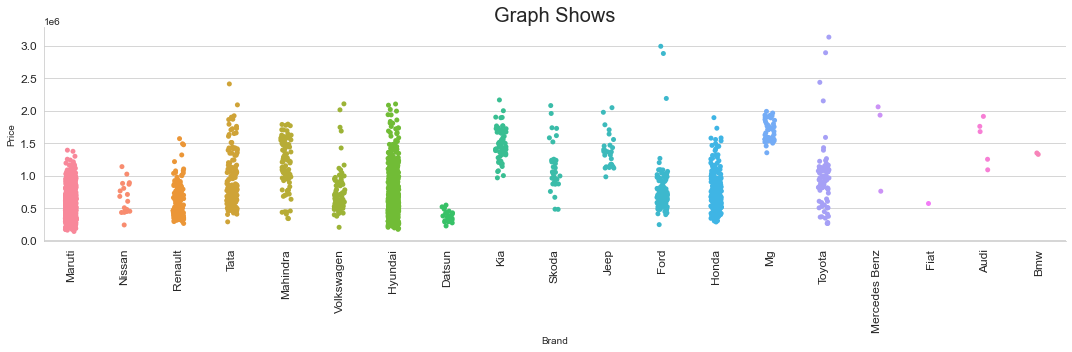

<Figure size 1296x720 with 0 Axes>

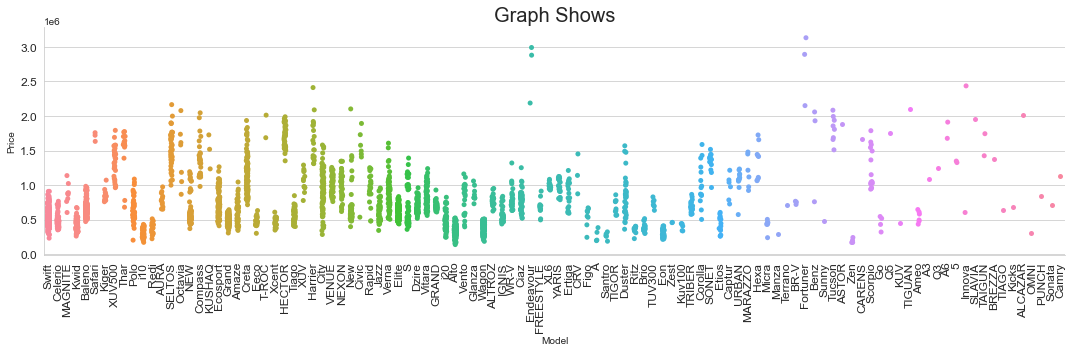

<Figure size 1296x720 with 0 Axes>

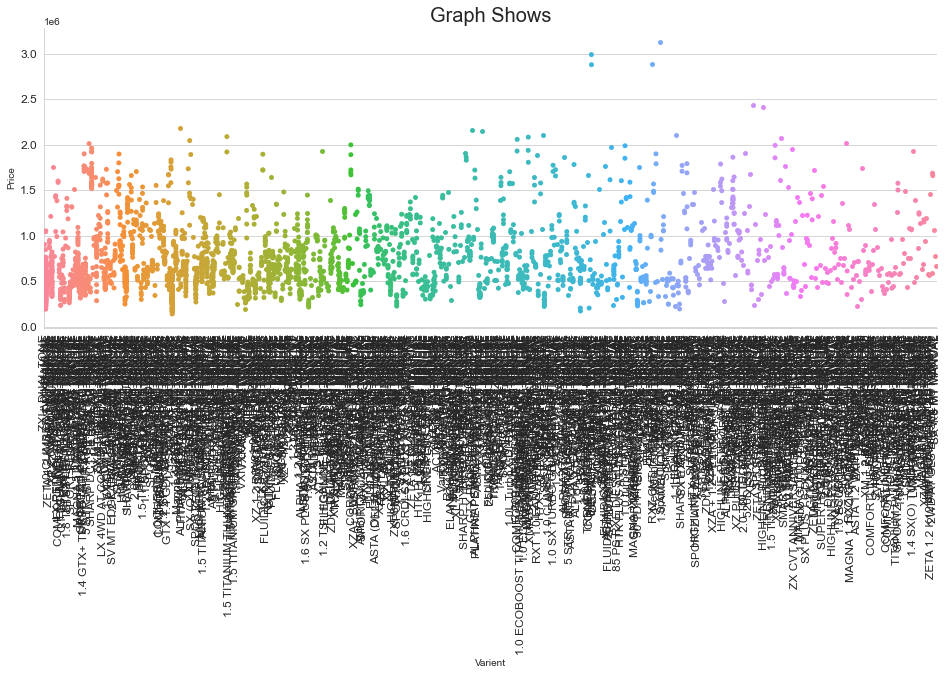

<Figure size 1296x720 with 0 Axes>

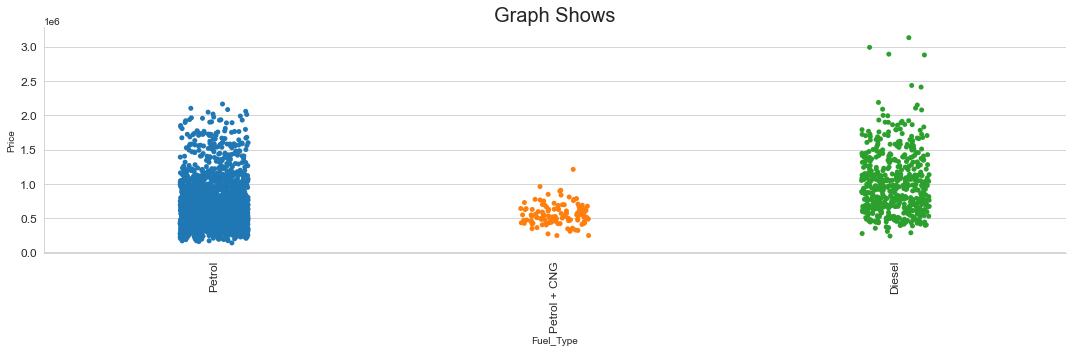

<Figure size 1296x720 with 0 Axes>

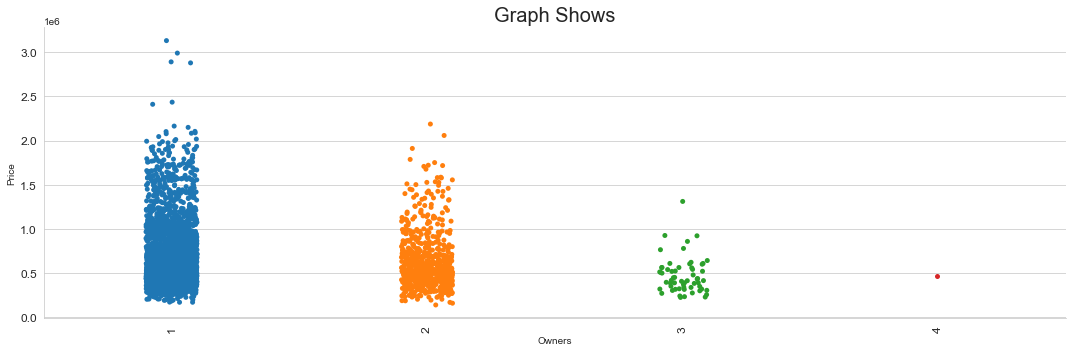

<Figure size 1296x720 with 0 Axes>

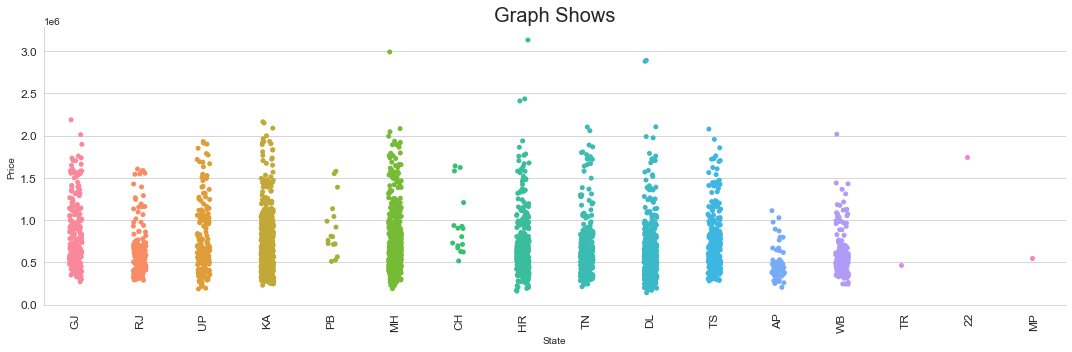

In [31]:
for i in df.columns:
    if df[i].dtypes=='object':
        sns.set_style("whitegrid")
        plt.figure(figsize=(18,10))
        sns.catplot(x=i,data=df,y='Price',aspect=3)
        plt.title("Graph Shows",fontsize=20)
        plt.xticks(rotation=90,fontsize=12)
        plt.yticks(rotation=0,fontsize=12)
        plt.tight_layout()

### Using-Scatter Plot

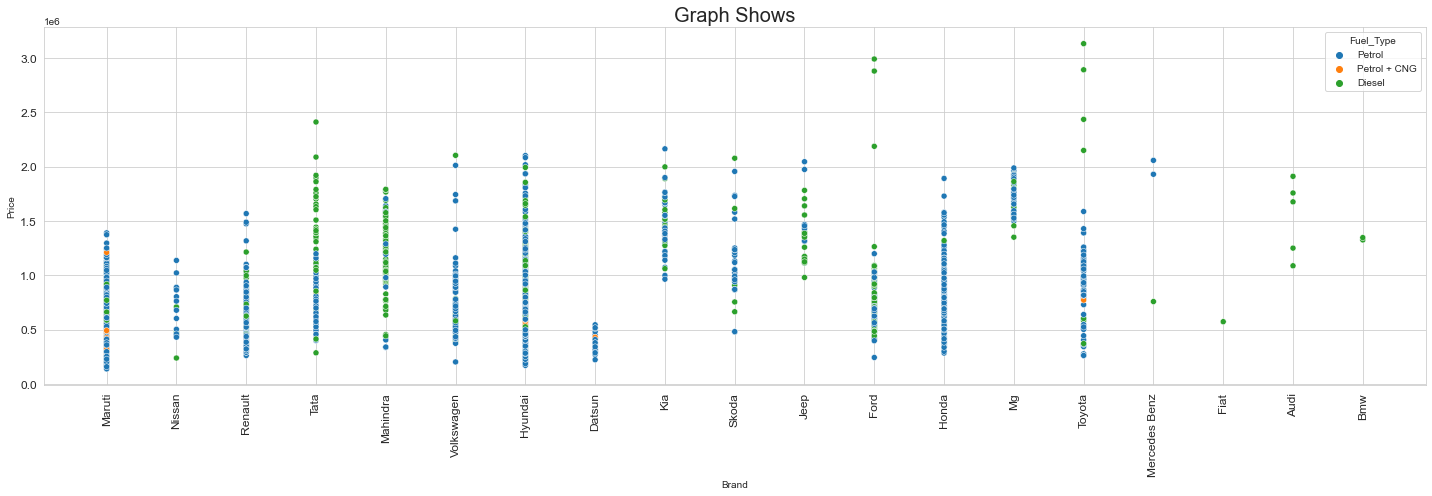

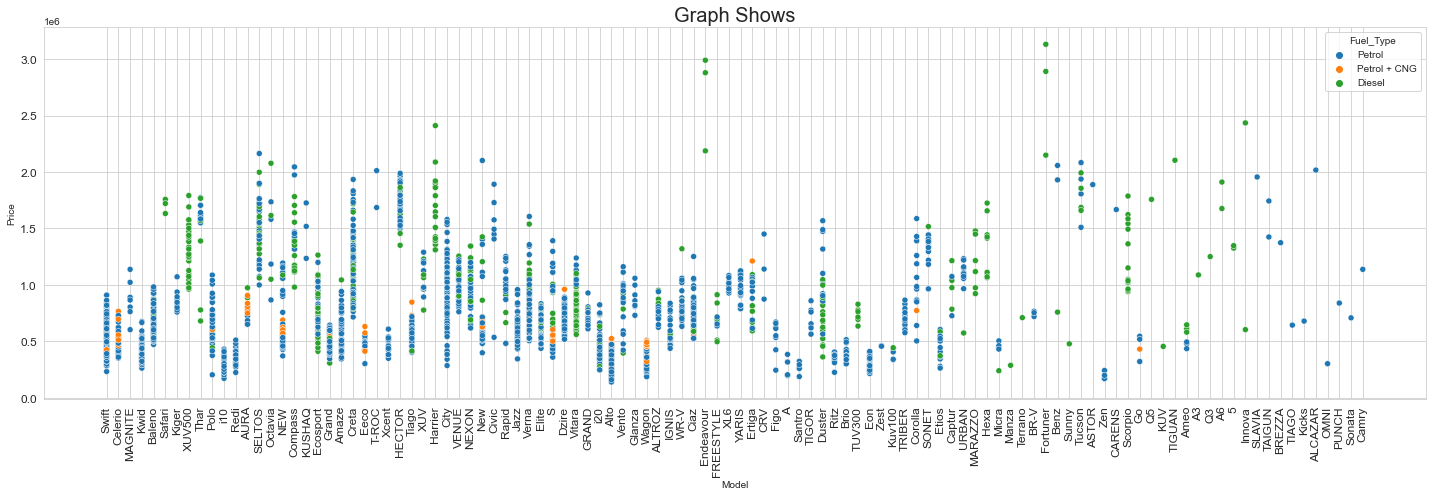

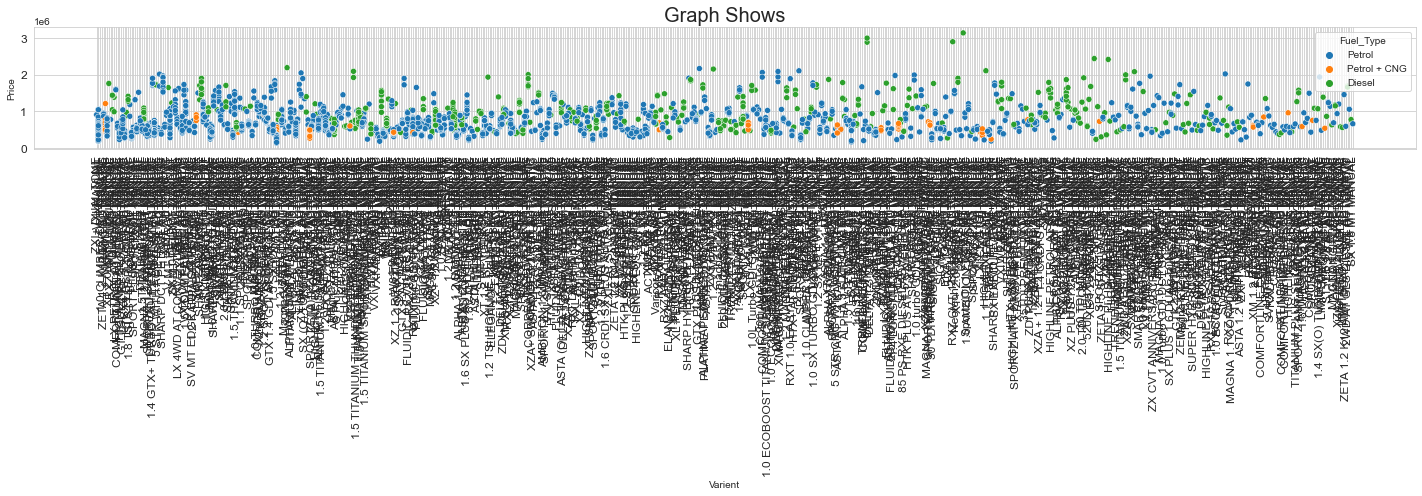

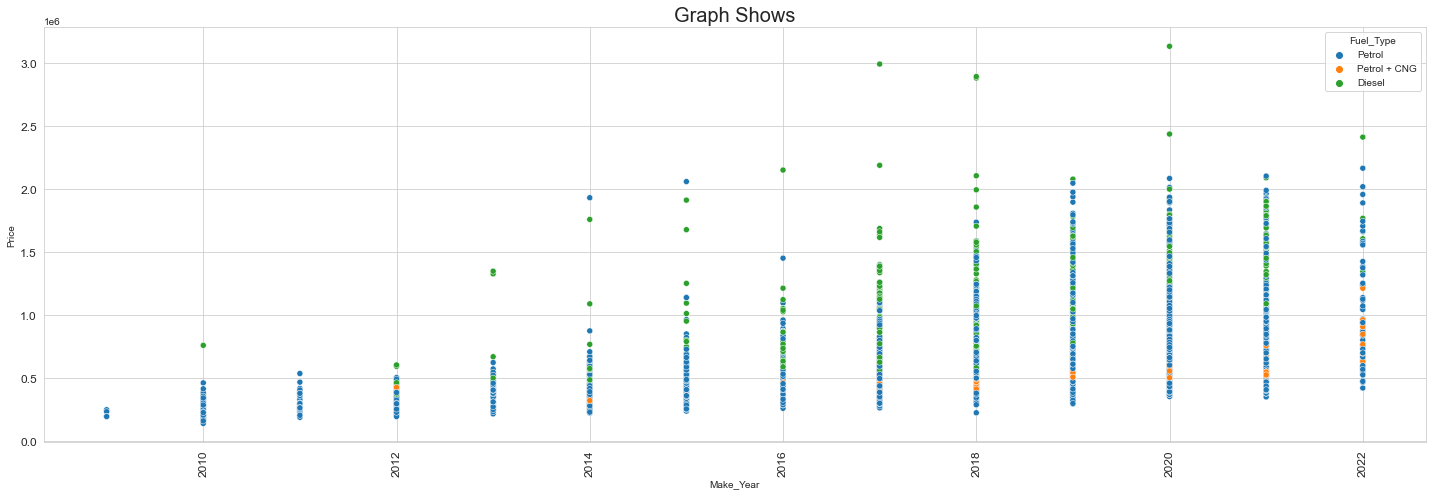

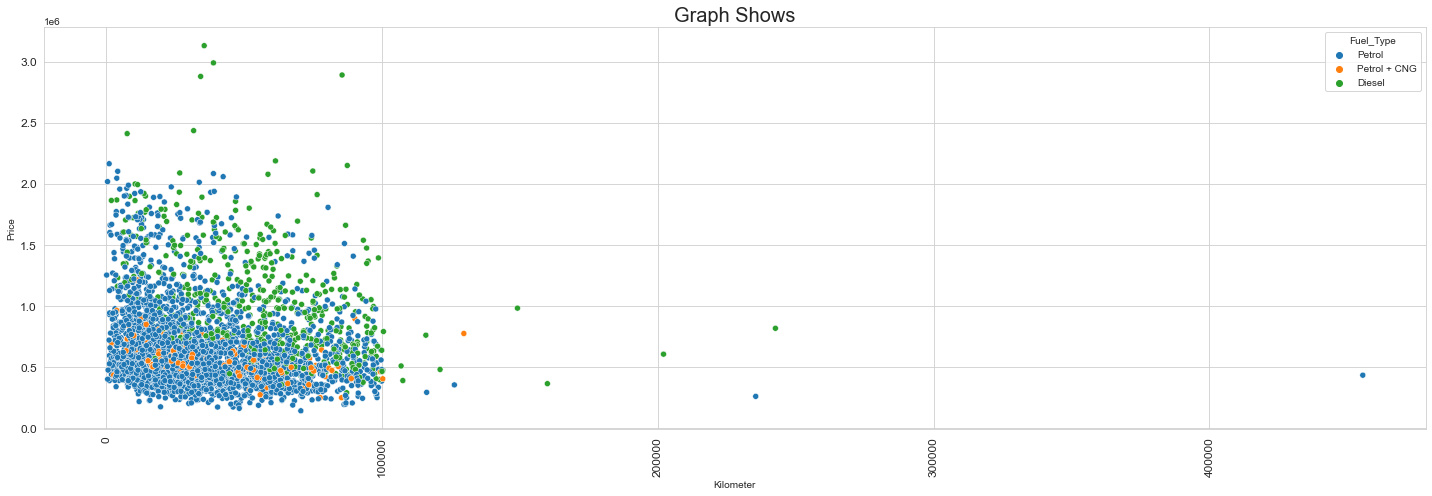

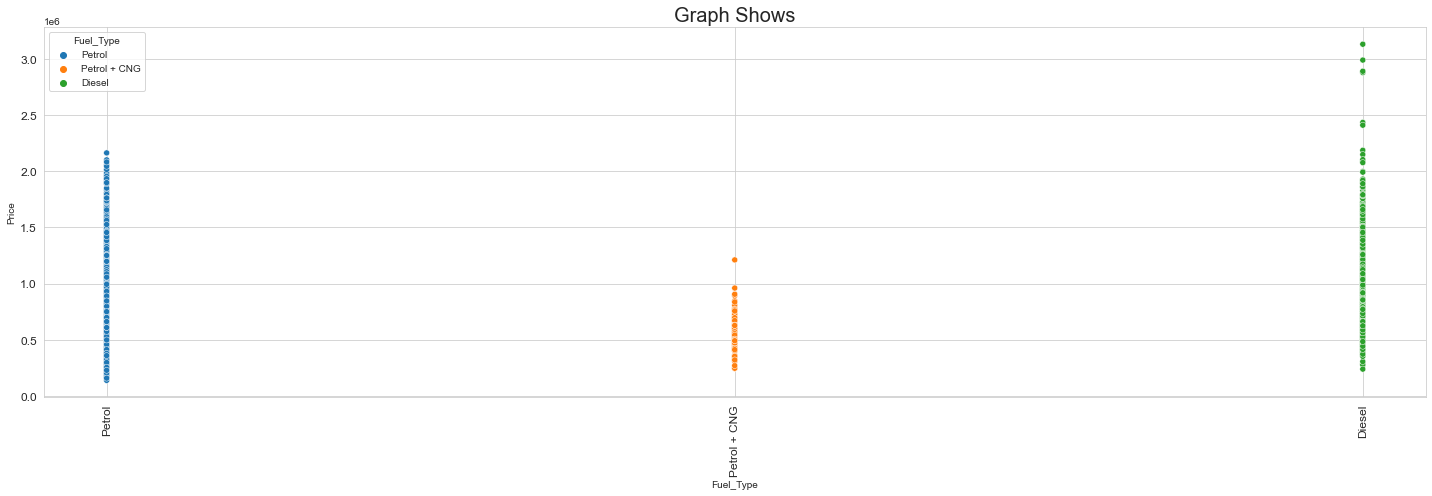

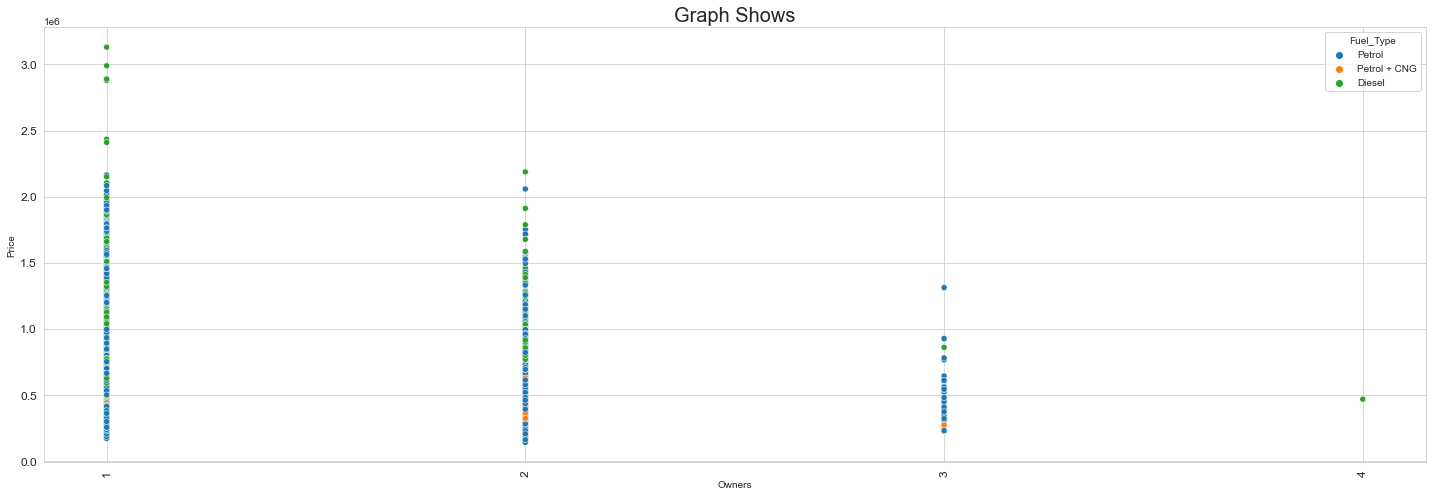

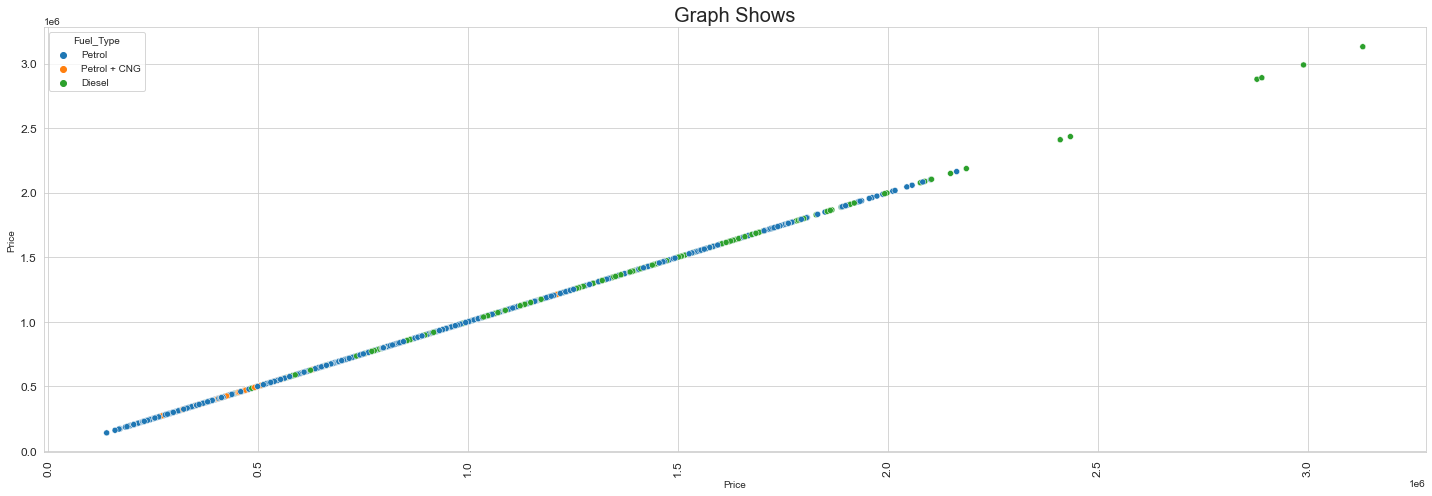

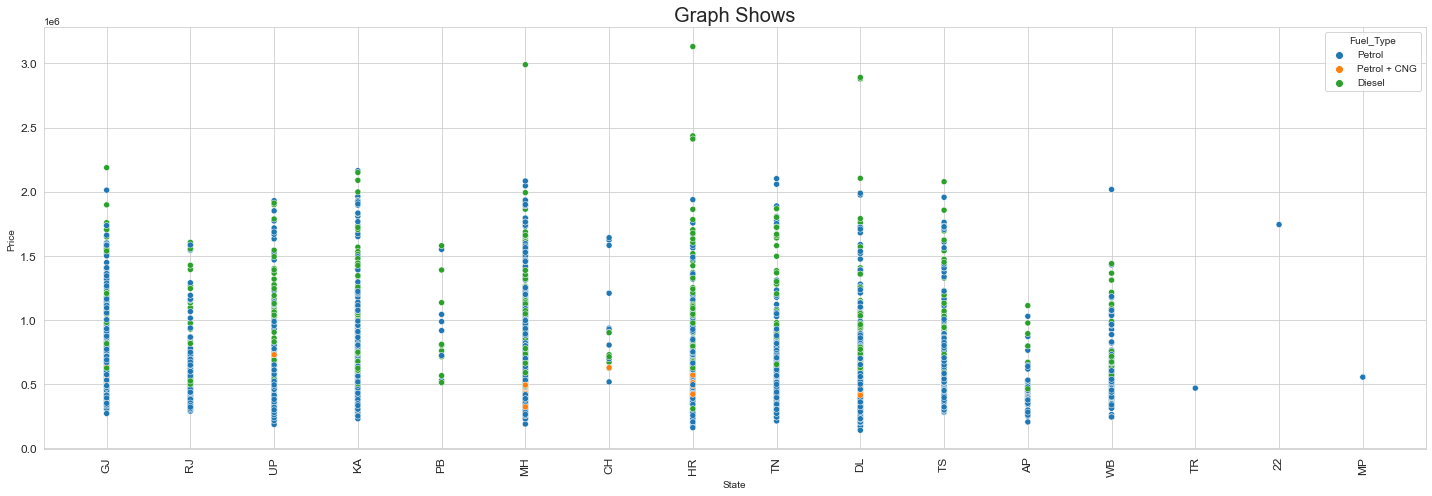

In [32]:
for i in df.columns:
    sns.set_style("whitegrid")
    plt.figure(figsize=(20,7))
    sns.scatterplot(x=i,data=df,y='Price',hue='Fuel_Type')
    plt.title("Graph Shows",fontsize=20)
    plt.xticks(rotation=90,fontsize=12)
    plt.yticks(rotation=0,fontsize=12)
    plt.tight_layout()

# Observation Shows:

- Diesel car prices are high as compare to petrol or model with petrol and cng.
- 1st Owner sells their cars in high price. 
- Datsun Peice are low, Toyota ,Ford shows maximum prices for sale.
- Maruti and Tata and Hyundai prices are low deviation.
- Endeavour, Fortuner prices are high compare to others, Harrier,compass and XUV 500 shows high price cars  
- Maximum sale of petrol cars in 2020 followed 2022.
- Price of Petrol Cars are high if the kilometers are less. 
- Gujrat has maximum sellers of petrol cars.
- UP,KA,MH,HR,TN,DL,TS,AP,WB has maximum Diesel cars.
- HR,KA,GJ having prices for diesal cars
- Maximum price can be noticed for HR,MH,DL for diesel
- Endevor and fortuner have high selling values.
- High price value for first owner car.

In [33]:
B_state=df.groupby(['State','Brand'],squeeze=['State']).sum().reset_index()
print("Brand Counts Per State")
B_state

Brand Counts Per State


State          Brand  Make_Year  Kilometer      Price
0      22     Volkswagen       2022       3504    1743099
1      AP           Ford       4033     158258    1165098
2      AP          Honda      12075     454092    2379594
3      AP        Hyundai      44314    1712076   10767478
4      AP       Mahindra       2019      96610     975399
5      AP         Maruti      64478    1903832   14398868
6      AP         Nissan       2014      60588     450399
7      AP        Renault       2018      42192     398499
8      AP          Skoda       2020      20517     870199
9      CH           Ford       2019      30231     899899
10     CH        Hyundai       8068     210589    2652316
11     CH       Mahindra       6063      44587    4470197
12     CH         Maruti       6054     176898    1919797
13     CH         Nissan       2021      20233     803399
14     CH          Skoda       2018      67544    1580599
15     CH         Toyota       4036      35404    1861398
16     CH     Volkswagen       2021      37886     903899
17     DL           Audi       4029     105931    3007798
18     DL         Datsun       4039      35369     850098
19     DL           Ford      36313     913961   14229082
20     DL          Honda      60499    1364466   20306420
21     DL        Hyundai     231934    4672917   65982135
22     DL           Jeep       4036      61222    3343998
23     DL            Kia       6060      32141    4481997
24     DL       Mahindra      22194     395349    9426889
25     DL         Maruti     508354    9237400  125491398
26     DL             Mg      12119     138735   10318094
27     DL         Nissan       6056      88671    1892297
28     DL        Renault      54502     932986   12976523
29     DL          Skoda      10104      63766    5541195
30     DL           Tata      52511     702866   20285774
31     DL         Toyota      20177     401743   11328990
32     DL     Volkswagen       8072     175841    3955196
33     GJ         Datsun       4041      12828     877698
34     GJ           Ford      18167     495644    8664491
35     GJ          Honda      48448    1112373   22310726
36     GJ        Hyundai     109000    1897602   42603196
37     GJ           Jeep      14125     413306    8180743
38     GJ            Kia      14135     278161    9236743
39     GJ       Mahindra      16161     191731   10076342
40     GJ         Maruti     127195    2383899   36902687
41     GJ             Mg      26260     412298   20574287
42     GJ         Nissan       2021      17653     603199
43     GJ        Renault      12121     112693    3310694
44     GJ          Skoda       8073     203110    5102296
45     GJ           Tata      20209     196220   11049090
46     GJ         Toyota       4039      65109    1718898
47     GJ     Volkswagen      18165     501508    7623291
48     HR           Audi       4029     130851    2763798
49     HR            Bmw       2013      83591    1325599
50     HR         Datsun       8077     160881    1423996
51     HR           Ford      16136     478724    5499792
52     HR          Honda      32271     685380   11439484
53     HR        Hyundai     123105    2415809   48711460
54     HR           Jeep       2019      46860    1781799
55     HR            Kia      14145     151501   10429893
56     HR       Mahindra      12115     204352    7854444
57     HR         Maruti     252259    4754987   67228175
58     HR             Mg       6057     156279    4490847
59     HR         Nissan       2017     121004     477799
60     HR        Renault      46451     627321   12656877
61     HR          Skoda       4036     112285    2105198
62     HR           Tata      34348     443839   17848410
63     HR         Toyota      18178     342061   12222091
64     HR     Volkswagen      14114     453147    4110493
65     KA         Datsun       8069     100385    1294796
66     KA           Ford      52445    1296245   20105374
67     KA          Honda     100805    2126477   34568050
68

<AxesSubplot:xlabel='Price', ylabel='Probability'>

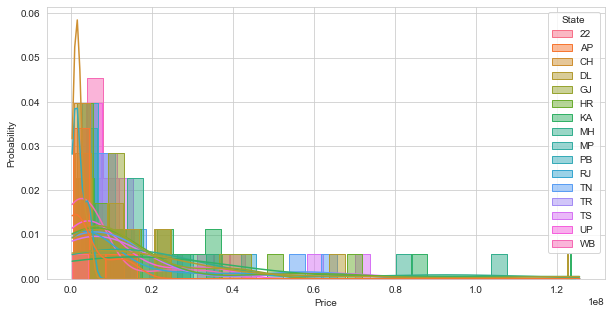

In [34]:
plt.figure(figsize=(10,5))
sns.histplot(x='Price',data=B_state,hue='State',element='step',multiple='dodge',stat='probability',kde=True)

In [35]:
count_state=df.groupby(['Fuel_Type','State']).size().reset_index().rename(columns={0:'Total Counts'})
count_state

Fuel_Type State  Total Counts
0         Diesel    AP            12
1         Diesel    CH             5
2         Diesel    DL            61
3         Diesel    GJ            35
4         Diesel    HR            58
5         Diesel    KA           122
6         Diesel    MH            62
7         Diesel    PB            10
8         Diesel    RJ            18
9         Diesel    TN            40
10        Diesel    TS            50
11        Diesel    UP            36
12        Diesel    WB            19
13        Petrol    22             1
14        Petrol    AP            53
15        Petrol    CH            10
16        Petrol    DL           425
17        Petrol    GJ           175
18        Petrol    HR           211
19        Petrol    KA           453
20        Petrol    MH           367
21        Petrol    MP             1
22        Petrol    PB             6
23        Petrol    RJ           138
24        Petrol    TN           270
25        Petrol    TR             1
26        Petrol    TS           231
27        Petrol    UP           137
28        Petrol    WB           124
29  Petrol + CNG    AP             1
30  Petrol + CNG    CH             1
31  Petrol + CNG    DL            30
32  Petrol + CNG    GJ             9
33  Petrol + CNG    HR            24
34  Petrol + CNG    KA             1
35  Petrol + CNG    MH            49
36  Petrol + CNG    RJ             1
37  Petrol + CNG    TN             1
38  Petrol + CNG    UP             3

Text(0.5, 1.0, 'Fuel_Type Cars Density')

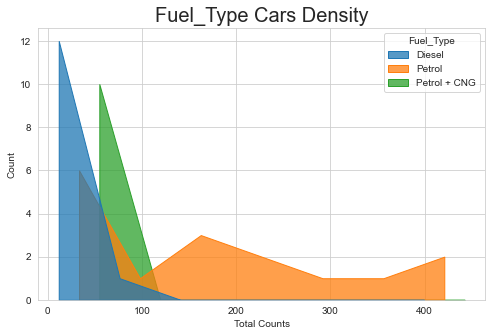

In [36]:
plt.figure(figsize=(8,5))
sns.histplot(x='Total Counts',data=count_state,hue='Fuel_Type',element='poly',multiple='dodge')
plt.title("Fuel_Type Cars Density",fontsize=20)

In [37]:
state_count=df.groupby(['State','Make_Year'],sort='State',group_keys=['State']).size().reset_index().rename(columns={0:'Total Counts'})
state_count

State  Make_Year  Total Counts
0      22       2022             1
1      AP       2010             2
2      AP       2011             2
3      AP       2012             9
4      AP       2013            15
5      AP       2014            15
6      AP       2015             2
7      AP       2016             3
8      AP       2017             5
9      AP       2018             3
10     AP       2019             3
11     AP       2020             5
12     AP       2021             2
13     CH       2015             1
14     CH       2016             1
15     CH       2017             3
16     CH       2018             3
17     CH       2019             2
18     CH       2021             6
19     DL       2009             2
20     DL       2010            10
21     DL       2011            10
22     DL       2012             7
23     DL       2013            12
24     DL       2014            30
25     DL       2015            42
26     DL       2016            46
27     DL       2017            68
28     DL       2018            94
29     DL       2019            74
30     DL       2020            62
31     DL       2021            47
32     DL       2022            12
33     GJ       2013             1
34     GJ       2014             5
35     GJ       2015             3
36     GJ       2016             6
37     GJ       2017            32
38     GJ       2018            32
39     GJ       2019            43
40     GJ       2020            46
41     GJ       2021            43
42     GJ       2022             8
43     HR       2010             3
44     HR       2011             5
45     HR       2012             1
46     HR       2013             4
47     HR       2014            13
48     HR       2015            14
49     HR       2016            16
50     HR       2017            30
51     HR       2018            44
52     HR       2019            55
53     HR       2020            53
54     HR       2021            44
55     HR       2022            11
56     KA       2009             1
57     KA       2010            16
58     KA       2011            18
59     KA       2012            24
60     KA       2013            21
61     KA       2014            37
62     KA       2015            38
63     KA       2016            65
64     KA       2017            83
65     KA       2018            87
66     KA       2019            68
67     KA       2020            56
68     KA       2021            57
69     KA       2022             5
70     MH       2010             2
71     MH       2011             4
72     MH       2012            12
73     MH       2013            15
74     MH       2014            30
75     MH       2015            27
76     MH       2016            59
77     MH       2017            74
78     MH       2018            81
79     MH       2019            57
80     MH       2020            56
81     MH       2021            50
82     MH       2022            11
83     MP       2018             1
84     PB       2010             1
85     PB       2015             1
86     PB       2017             1
87     PB       2018             5
88     PB       2019             3
89     PB       2021             5
90     RJ       2012             2
91     RJ       2013             2
92     RJ       2014             6
93     RJ       2015             5
94     RJ       2016            12
95     RJ       2017            14
96     RJ       2018            43
97     RJ       2019            30
98     RJ       2020            25
99     RJ       2021            11
100    RJ       2022             7
101    TN       2010             1
102    TN       2011             1
103    TN       2012             3
104    TN       2013             6
105    TN       2014            13
106    TN       2015            18
107    TN       2016            41
108    TN       2017            47
109    TN       2018            67
110    TN       2019            58
111    TN       2020            28
112    TN       2021            23
113    TN     

Text(0.5, 1.0, 'Vheicle Counts for sale as per Location')

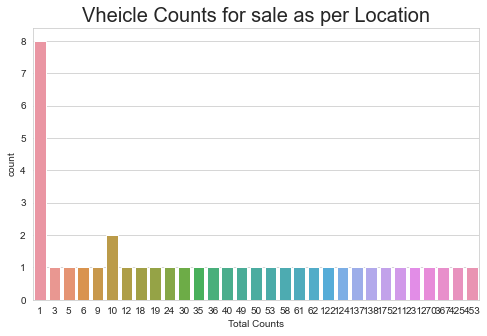

In [38]:
plt.figure(figsize=(8,5))
sns.countplot(x='Total Counts',data=count_state)
plt.title("Vheicle Counts for sale as per Location",fontsize=20)


# Multi-Variate Analysis

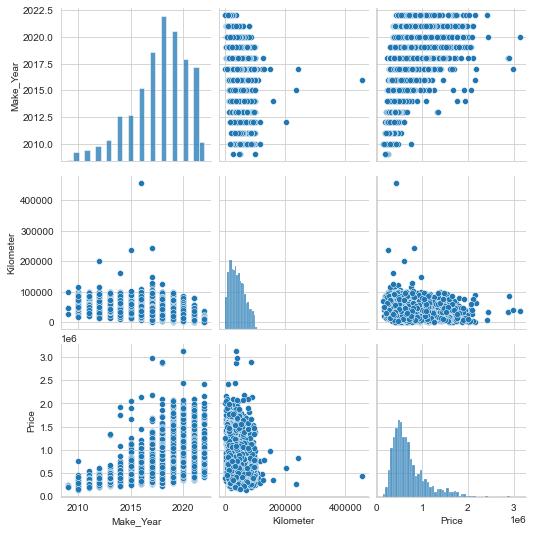

In [39]:
sns.pairplot(data=df)

## Feature Engneering

In [40]:
df['Period_Year']=[2022-i for i in df['Make_Year']]

df.drop(['Make_Year'],axis=1,inplace=True)

## Label Encoder

In [41]:
from sklearn.preprocessing import LabelEncoder
le=LabelEncoder()
for i in df.columns:
    if df[i].dtype=='object':
        df[i]=le.fit_transform(df[i])
        

In [42]:
df.head(2)

Brand  Model  Varient  Make_Year  Kilometer  Fuel_Type  Owners   Price  \
0     10     80      715       2021      37089          1       0  908299   
1     10     20      577       2017      93472          1       0  394699   

   State  Period_Year  
0      4            1  
1      4            5

## Descriptive Statisics

In [43]:
df.describe()

Brand        Model      Varient    Make_Year      Kilometer  \
count  3251.000000  3251.000000  3251.000000  3251.000000    3251.000000   
mean      9.245463    50.452476   387.501384  2017.706552   40867.896647   
std       3.635641    31.517562   206.005315     2.577539   26807.765606   
min       0.000000     0.000000     0.000000  2009.000000      97.000000   
25%       6.000000    24.000000   216.000000  2016.000000   19607.500000   
50%      10.000000    43.000000   405.000000  2018.000000   37216.000000   
75%      10.000000    80.000000   577.000000  2020.000000   58557.000000   
max      18.000000   107.000000   719.000000  2022.000000  455601.000000   

        Fuel_Type       Owners         Price        State  Period_Year  
count  3251.00000  3251.000000  3.251000e+03  3251.000000  3251.000000  
mean      0.87450     0.245155  7.055692e+05     7.445709     4.293448  
std       0.42852     0.472509  3.714379e+05     3.864042     2.577539  
min       0.00000     0.000000  1.390990e+05     0.000000     0.000000  
25%       1.00000     0.000000  4.522990e+05     4.000000     2.000000  
50%       1.00000     0.000000  6.054990e+05     6.000000     4.000000  
75%       1.00000     0.000000  8.487490e+05    11.000000     6.000000  
max       2.00000     3.000000  3.131049e+06    15.000000    13.000000

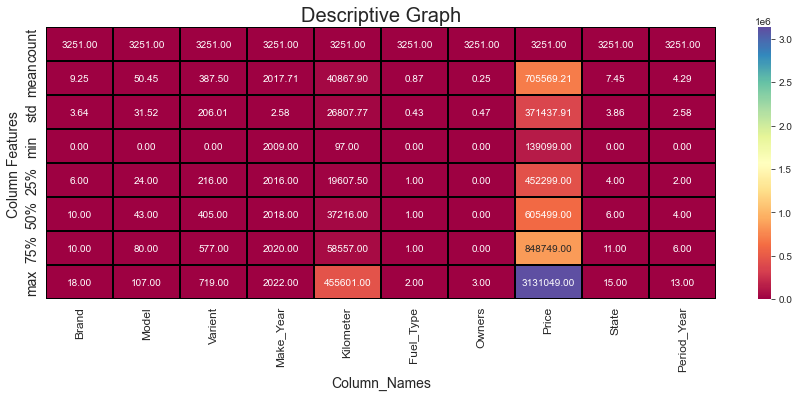

In [44]:
plt.figure(figsize=(15,5))
sns.heatmap(df.describe(),annot=True,linecolor='black',linewidth=0.02,fmt='0.2f',cmap='Spectral')
plt.title("Descriptive Graph",fontsize=20)
plt.xlabel("Column_Names",fontsize=14)
plt.ylabel("Column Features",fontsize=14)
plt.xticks(rotation=90,fontsize=12)
plt.yticks(rotation=90,fontsize=14)
plt.show()

## Observation:
- No Null values
- RIght Skewed Data ->Model,Kilometer,Price,State
- Left Skewed Data -> Varient
- Standard Deviation- Varient,kilometer,Price
- Huge Outliers- Kilometer

# Correlation Graph

In [45]:
df.corr()

Brand     Model   Varient  Make_Year  Kilometer  Fuel_Type  \
Brand        1.000000  0.125430  0.316435   0.179381  -0.112047   0.021162   
Model        0.125430  1.000000  0.090552  -0.072730   0.003068  -0.070223   
Varient      0.316435  0.090552  1.000000  -0.003482  -0.031760   0.012006   
Make_Year    0.179381 -0.072730 -0.003482   1.000000  -0.494460   0.060805   
Kilometer   -0.112047  0.003068 -0.031760  -0.494460   1.000000  -0.227091   
Fuel_Type    0.021162 -0.070223  0.012006   0.060805  -0.227091   1.000000   
Owners      -0.071758  0.027425 -0.012886  -0.226648   0.118284  -0.001484   
Price        0.049910  0.060685 -0.094927   0.471042  -0.174193  -0.345269   
State       -0.033591 -0.010355 -0.010571   0.091359   0.010211  -0.046670   
Period_Year -0.179381  0.072730  0.003482  -1.000000   0.494460  -0.060805   

               Owners     Price     State  Period_Year  
Brand       -0.071758  0.049910 -0.033591    -0.179381  
Model        0.027425  0.060685 -0.010355     0.072730  
Varient     -0.012886 -0.094927 -0.010571     0.003482  
Make_Year   -0.226648  0.471042  0.091359    -1.000000  
Kilometer    0.118284 -0.174193  0.010211     0.494460  
Fuel_Type   -0.001484 -0.345269 -0.046670    -0.060805  
Owners       1.000000 -0.133711  0.007376     0.226648  
Price       -0.133711  1.000000  0.012343    -0.471042  
State        0.007376  0.012343  1.000000    -0.091359  
Period_Year  0.226648 -0.471042 -0.091359     1.000000

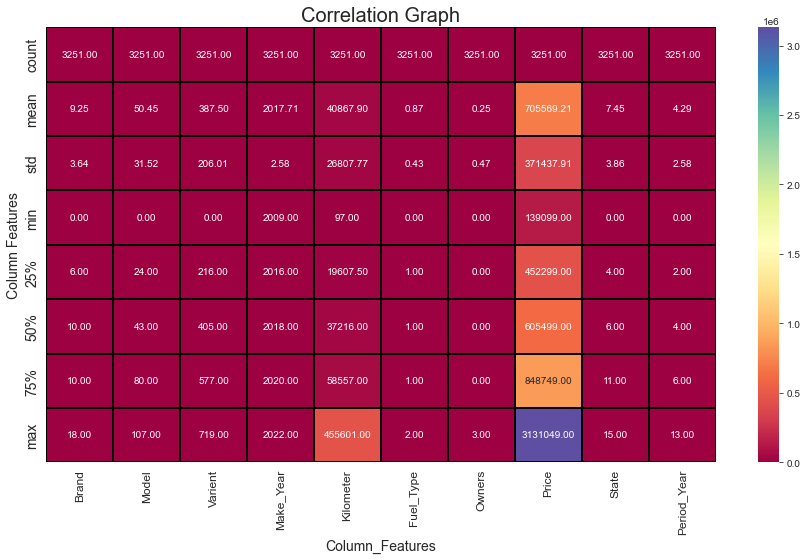

In [46]:
plt.figure(figsize=(15,8))
sns.heatmap(df.describe(),annot=True,linecolor='black',linewidth=0.02,fmt='0.2f',cmap='Spectral')
plt.title("Correlation Graph",fontsize=20)
plt.xlabel("Column_Features",fontsize=14)
plt.ylabel("Column Features",fontsize=14)
plt.xticks(rotation=90,fontsize=12)
plt.yticks(rotation=90,fontsize=14)
plt.show()

In [47]:
df.corr()['Price'].sort_values()

Period_Year   -0.471042
Fuel_Type     -0.345269
Kilometer     -0.174193
Owners        -0.133711
Varient       -0.094927
State          0.012343
Brand          0.049910
Model          0.060685
Make_Year      0.471042
Price          1.000000
Name: Price, dtype: float64

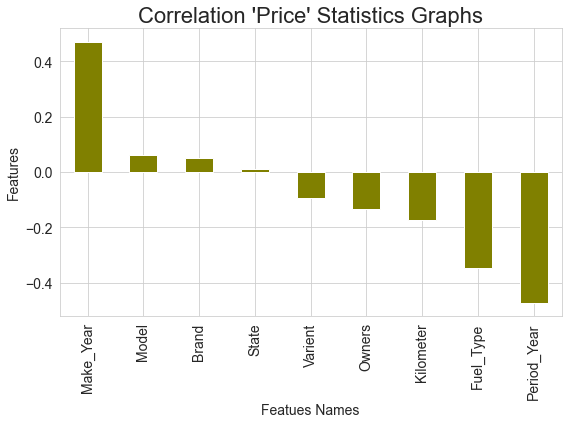

In [48]:
plt.figure(figsize=(8,6))
df.corr()['Price'].sort_values(ascending=False).drop(['Price']).plot(kind='bar',color='olive')
plt.title("Correlation 'Price' Statistics Graphs",fontsize=22)
plt.xlabel("Featues Names",fontsize=14)
plt.ylabel('Features',fontsize=14)
plt.xticks(rotation=90,fontsize=14)
plt.yticks(rotation=0,fontsize=14)
plt.tight_layout()

# Observation Shows:

- Period_Year is 47 percentage Negatively Correlated with the Target Variable
- Fuel_Type is 35 percentage Negatively Correlated with the Target Variable
- Kilometer is 17 percentage Negatively Correlated with the Target Variable.
- Owners is 13 percentage Negatively Correlated with the Target Variable.
- Variable is 10 percentage Negatively Correlated with the Target Variable.
- State is 1 percentage Positively correlated with the Target Variable.
- Brand is 5 percentage Positively correlated with the Target Variable
- Model is 6 percentage Positively Correlated with the Target Variable
- Price is 100 percentage correlated to OWn.

NOTE:
    
- Period_Year Worse Correlated
- Model is Positively Correlated with the Target Variable.

# Checking Outliers

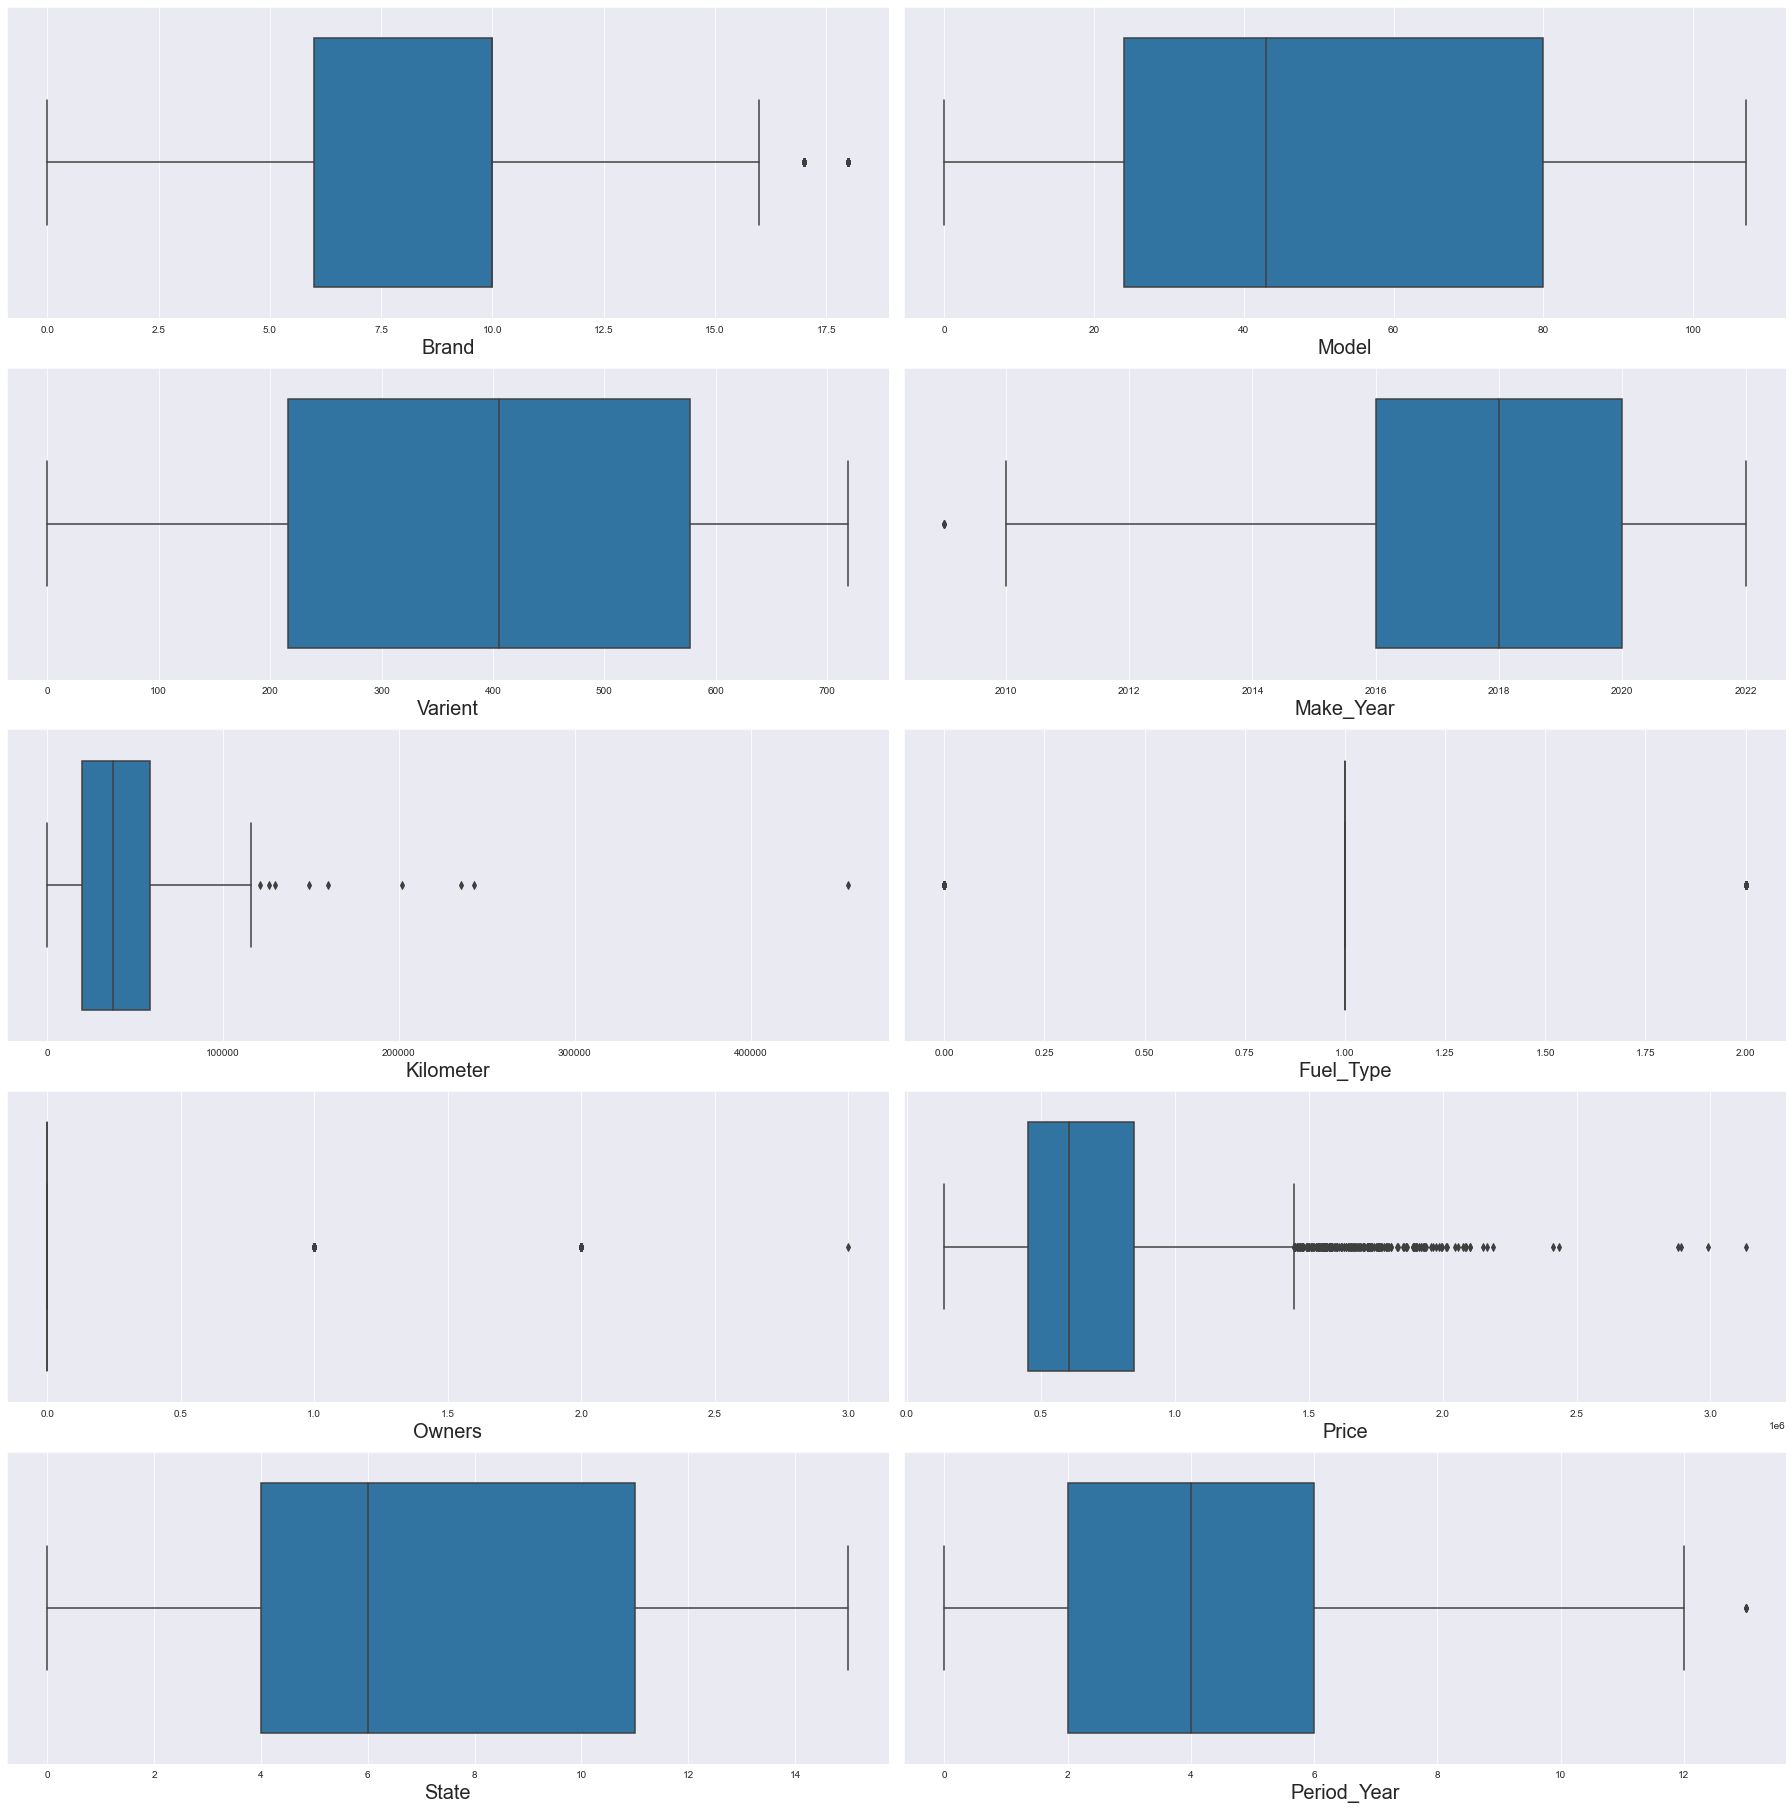

In [49]:
plt.figure(figsize=(25,100),facecolor='white',edgecolor='black')
plotnumb=1

for i in df.columns:
    if plotnumb<=20:
        sns.set_style("darkgrid")
        ax=plt.subplot(20,2,plotnumb)
        sns.boxplot(x=i,data=df)
        plt.xlabel(i,fontsize=20)
        
    plotnumb+=1
plt.tight_layout()

### Observation :

- Huge Outliers : Price
- Less Outliers : Period_Year, Kilometer, Brand 

Note: Price is a target Variable

## Skewness

In [50]:
df.skew().sort_values()

Make_Year     -0.748352
Fuel_Type     -0.692070
Varient       -0.268428
Model          0.263977
State          0.507230
Brand          0.583211
Period_Year    0.748352
Price          1.576309
Owners         1.731919
Kilometer      1.865755
dtype: float64

###  Skewness Above +/- 65 is considered very high

columns shows skewness are:

- Fuel_Type
- Period_Year
- Price
- Owners
- Kilometer

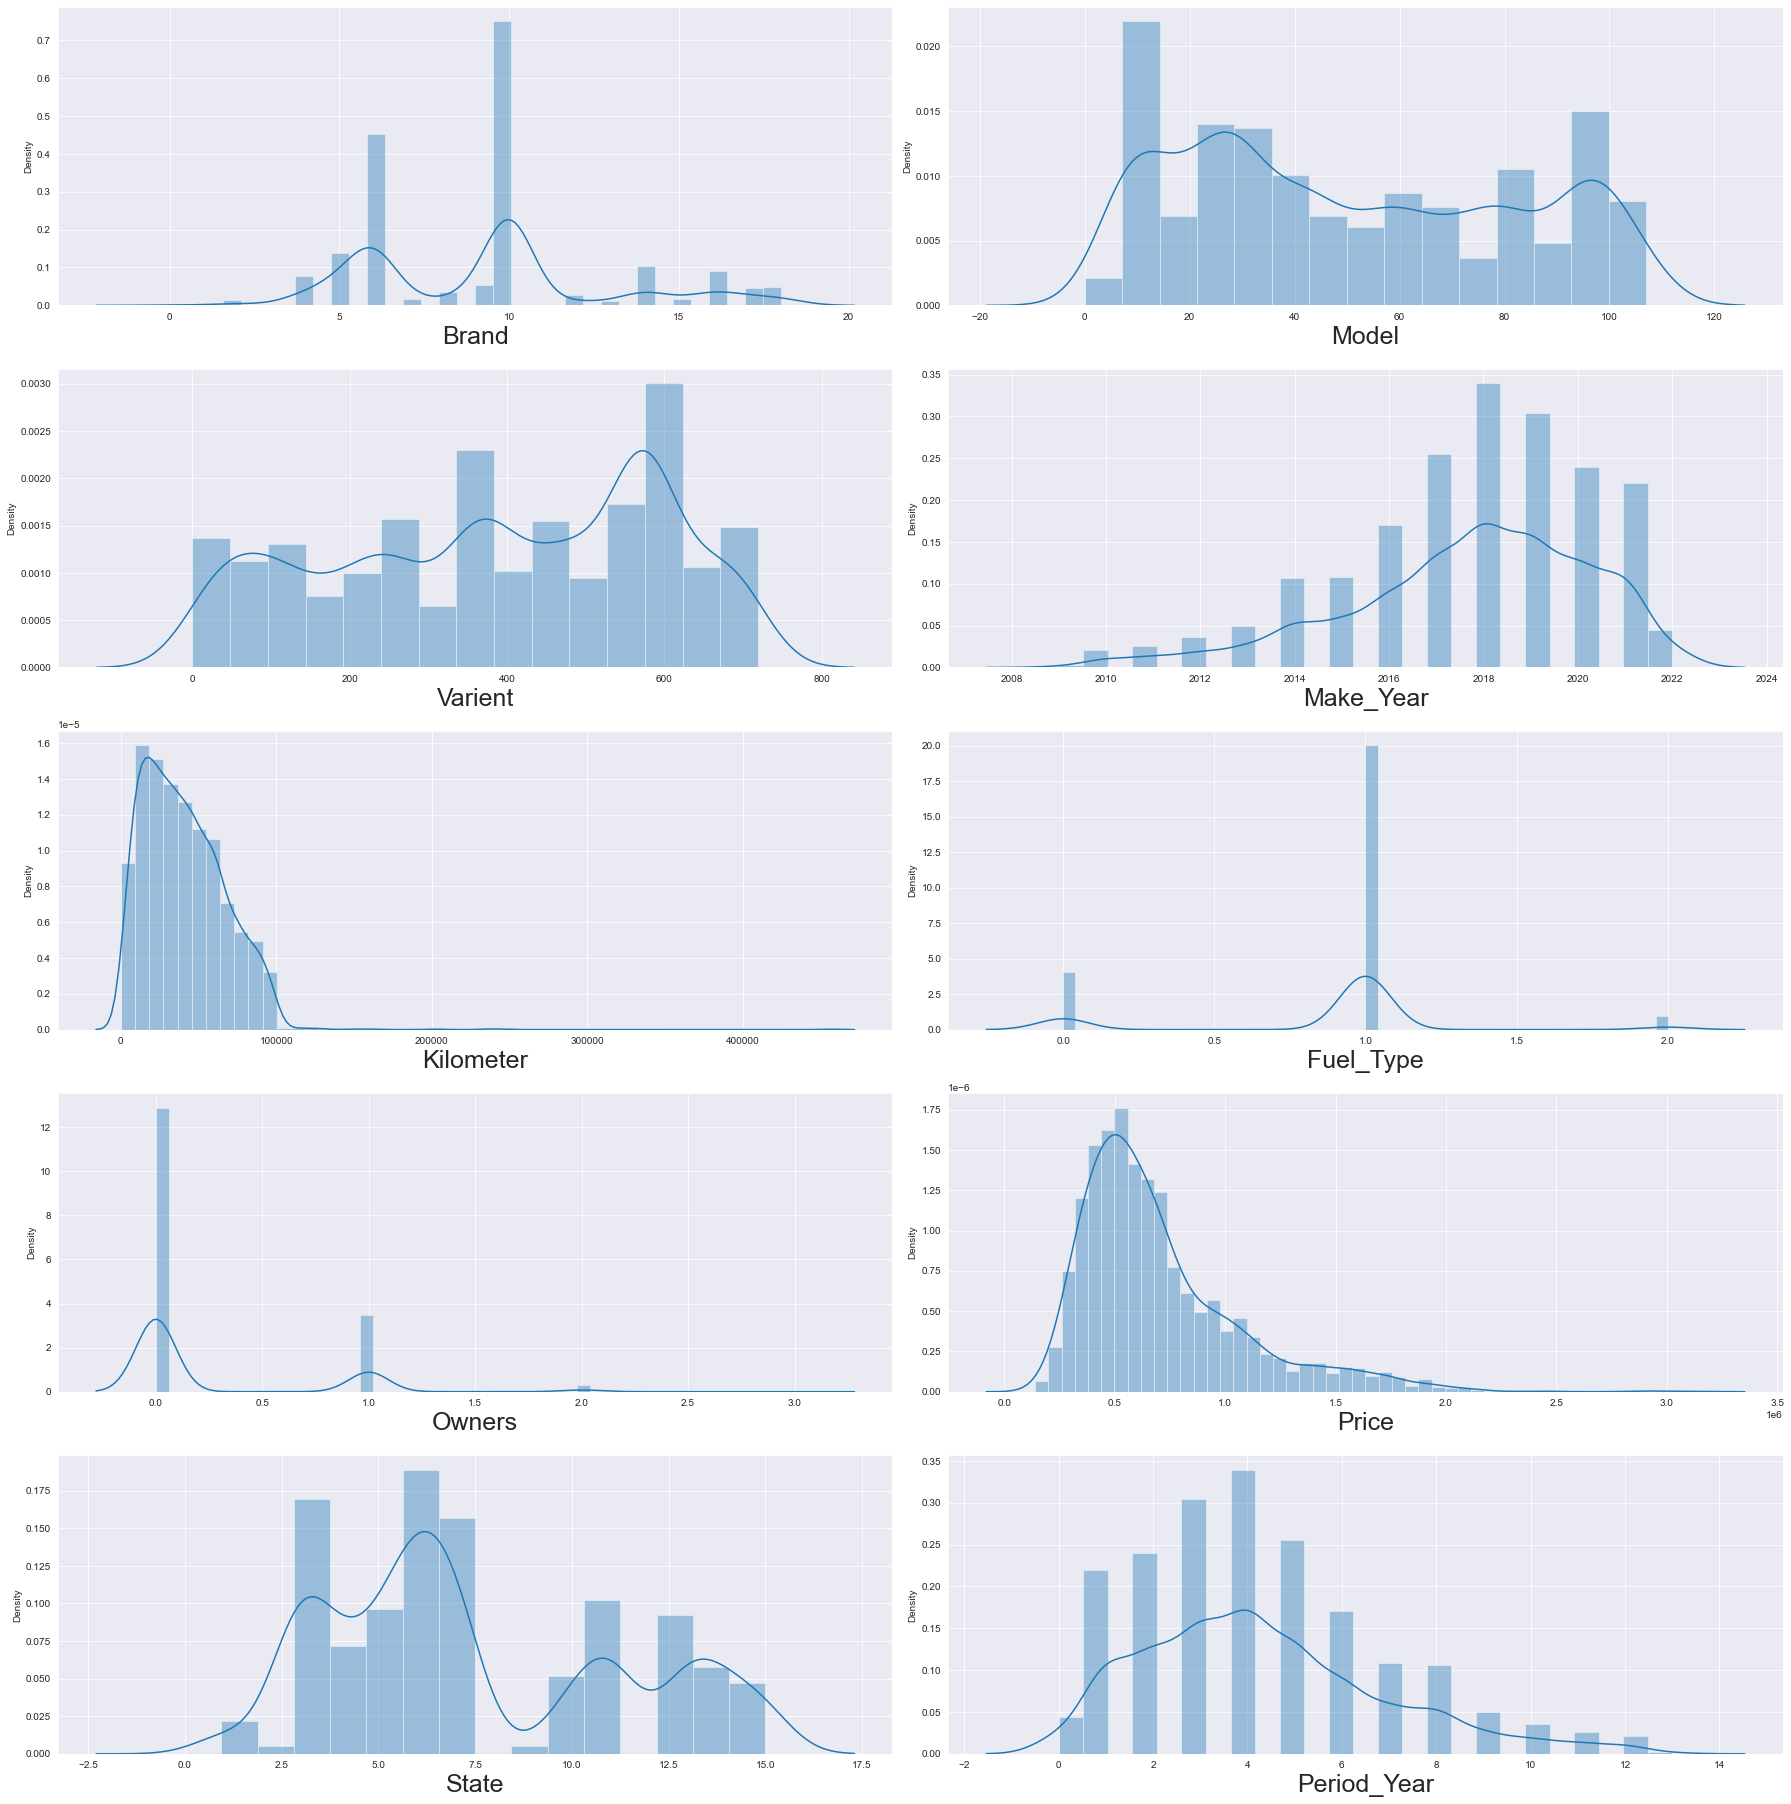

In [51]:
plt.figure(figsize=(25,100))
plotnumb=1

for i in df.columns:
    if plotnumb<=20:
        sns.set_style("darkgrid")
        ax=plt.subplot(20,2,plotnumb)
        sns.distplot(df[i])
        plt.xlabel(i,fontsize=25)
        
    plotnumb+=1
plt.tight_layout()

### Graph Observation

- Brand graph shows its is not norlised as the graph lies beyond the Normal curve (Multi-Modal) 
- Model graph shows is not normalised. as the building blocks are beyond the normal curve.
- Varient graph Shows that it is not normalised as the building blocks are beyond the normal curve.
- Kilometer graph Shows that it is not normalised as the building blocks are beyond the normal graph.
- Fuel_Type Shows Graph data has three modes.
- Owners Shows Graph data has 3 modes.
- Price graph Shows data not normalised.
- State and Period_Year shows data is not normalised.

# Data Cleansing:

In [52]:
df.corr()['Price'].sort_values()

Period_Year   -0.471042
Fuel_Type     -0.345269
Kilometer     -0.174193
Owners        -0.133711
Varient       -0.094927
State          0.012343
Brand          0.049910
Model          0.060685
Make_Year      0.471042
Price          1.000000
Name: Price, dtype: float64

In [53]:
delete=pd.DataFrame(data={'Column':['Period_Year'],'Values':[-0.471042],'Outliers':['Yes'],'Normalised':['Yes']})
delete

Column    Values Outliers Normalised
0  Period_Year -0.471042      Yes        Yes

In [54]:
df.drop(['Period_Year'],axis=1,inplace=True)

# Removing Outliers

In [55]:
z=np.abs(zscore(df))
z.head(3)

Brand     Model   Varient  Make_Year  Kilometer  Fuel_Type    Owners  \
0  0.207571  0.937638  1.590003   1.277946   0.140984   0.292913  0.518917   
1  0.207571  0.966355  0.920014   0.274161   1.962573   0.292913  0.518917   
2  0.207571  0.937638  0.920014   1.050214   0.110437   0.292913  0.518917   

      Price     State  
0  0.545881  0.891874  
1  0.837066  0.891874  
2  0.744708  0.661143

In [56]:
np.where(z>3)

(array([  15,   45,   76,  111,  162,  184,  205,  240,  253,  272,  312,
         322,  365,  386,  397,  427,  431,  435,  449,  478,  493,  560,
         598,  606,  679,  737,  740,  753,  769,  782,  789,  830,  845,
         859,  885,  889,  893,  895,  898,  912,  915,  925,  984,  987,
         994, 1016, 1066, 1068, 1101, 1105, 1107, 1128, 1155, 1219, 1243,
        1287, 1295, 1318, 1349, 1365, 1431, 1434, 1459, 1486, 1503, 1574,
        1580, 1698, 1716, 1725, 1866, 1906, 1991, 2041, 2049, 2059, 2066,
        2082, 2089, 2094, 2133, 2144, 2151, 2156, 2220, 2250, 2260, 2268,
        2282, 2350, 2390, 2421, 2423, 2435, 2491, 2497, 2515, 2563, 2579,
        2590, 2611, 2635, 2640, 2670, 2777, 2822, 2849, 2919, 2934, 2965,
        3031, 3035, 3105, 3127, 3182, 3183, 3184, 3187, 3247], dtype=int64),
 array([6, 7, 7, 6, 7, 4, 6, 7, 6, 6, 7, 7, 6, 6, 7, 6, 6, 3, 7, 7, 6, 6,
        6, 6, 7, 7, 7, 7, 7, 7, 6, 6, 7, 6, 6, 6, 6, 6, 6, 7, 6, 7, 6, 6,
        6, 7, 6, 6, 6, 6, 6, 6, 7, 

In [57]:
z.iloc[15,5]

0.292913038323984

In [58]:
#replacing new_df

new_df=df[(z<3).all(axis=1)]

## Data Loss Percentage

In [59]:
print("Old Data Frame ",df.shape[0],"New Data Frame ",new_df.shape[0]," Total_Dropped ",df.shape[0]-new_df.shape[0])

Old Data Frame  3251 New Data Frame  3132  Total_Dropped  119


In [60]:
print("Data Loss Percentage",((df.shape[0]-new_df.shape[0])/df.shape[0])*100)

Data Loss Percentage 3.6604121808674255


- The Data Loss is not more than 5 percentage, so we will go with the New Data Frame

### Dividing The Data For Train and Test

In [61]:
# Shape of x
x=new_df.drop(['Price'],axis=1)

In [62]:
# Shaped for y
y=new_df.iloc[:,-2]

In [63]:
print("SHAPE OF X IS ",x.shape," SHAPE OF Y IS ", y.shape)

SHAPE OF X IS  (3132, 8)  SHAPE OF Y IS  (3132,)


In [64]:
x.columns

Index(['Brand', 'Model', 'Varient', 'Make_Year', 'Kilometer', 'Fuel_Type',
       'Owners', 'State'],
      dtype='object')

## Using Standard Scaler

In [65]:
from sklearn.preprocessing import StandardScaler
ss=StandardScaler()

x=ss.fit_transform(x)
x

array([[ 0.21352049,  0.9366041 ,  1.57939468, ...,  0.28593906,
        -0.52117173, -0.89056455],
       [ 0.21352049, -0.96796174,  0.91146877, ...,  0.28593906,
        -0.52117173, -0.89056455],
       [ 0.21352049,  0.9366041 ,  0.91146877, ...,  0.28593906,
        -0.52117173,  0.66246895],
       ...,
       [ 0.21352049,  1.50797385,  0.91146877, ...,  0.28593906,
        -0.52117173, -1.14940346],
       [ 0.21352049, -1.3488749 , -0.13398048, ...,  0.28593906,
         1.91875333, -0.63172563],
       [-0.89367515,  0.33349159,  0.60170603, ...,  0.28593906,
        -0.52117173, -0.63172563]])

In [66]:
x=pd.DataFrame(data=x,columns=['Brand', 'Model', 'Varient', 'Make_Year', 'Kilometer', 'Fuel_Type',
       'Owners', 'State'])

In [67]:
print(" Mean Value ",round(x.mean(),2)," Standard Deviation ",round(x.std(),2))

 Mean Value  Brand        0.0
Model       -0.0
Varient     -0.0
Make_Year   -0.0
Kilometer   -0.0
Fuel_Type    0.0
Owners       0.0
State       -0.0
dtype: float64  Standard Deviation  Brand        1.0
Model        1.0
Varient      1.0
Make_Year    1.0
Kilometer    1.0
Fuel_Type    1.0
Owners       1.0
State        1.0
dtype: float64


# Removing Skewness

In [68]:
from sklearn.preprocessing import power_transform

x=power_transform(x,method='yeo-johnson')
x

array([[ 0.33863281,  0.95808891,  1.75900749, ...,  0.19929181,
        -0.52117173, -0.92215559],
       [ 0.33863281, -0.98406732,  0.91642518, ...,  0.19929181,
        -0.52117173, -0.92215559],
       [ 0.33863281,  0.95808891,  0.91642518, ...,  0.19929181,
        -0.52117173,  0.78713302],
       ...,
       [ 0.33863281,  1.41773596,  0.91642518, ...,  0.19929181,
        -0.52117173, -1.31092678],
       [ 0.33863281, -1.46282651, -0.23407257, ...,  0.19929181,
         1.91875333, -0.56069533],
       [-0.91791632,  0.42792059,  0.5510823 , ...,  0.19929181,
        -0.52117173, -0.56069533]])

In [69]:
x=pd.DataFrame(data=x,columns=['Brand', 'Model', 'Varient', 'Make_Year', 'Kilometer', 'Fuel_Type',
       'Owners', 'State'])

In [70]:
x.skew()

Brand        0.062161
Model        0.062613
Varient     -0.053454
Make_Year   -0.038865
Kilometer    0.071276
Fuel_Type    0.589299
Owners       1.398251
State        0.046733
dtype: float64

In [71]:
x.drop(['Owners'],axis=1,inplace=True)

In [72]:
x.skew()

Brand        0.062161
Model        0.062613
Varient     -0.053454
Make_Year   -0.038865
Kilometer    0.071276
Fuel_Type    0.589299
State        0.046733
dtype: float64

In [73]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

def calc_vif(x):
    vif=pd.DataFrame()
    vif['Variable']=x.columns
    vif['VIF Factors']=[variance_inflation_factor(x.values,i) for i in range(x.shape[1])]
    return vif
calc_vif(x)

Variable  VIF Factors
0      Brand     1.202875
1      Model     1.026554
2    Varient     1.147361
3  Make_Year     1.547152
4  Kilometer     1.549560
5  Fuel_Type     1.053717
6      State     1.017410

## Observation Shows:

- Vif shows Normalised

### Target Variable:

In [74]:
# Target Values

y.unique()

array([908299, 394699, 428999, ..., 254099, 159099, 662699], dtype=int64)

# Linear Regression

In [75]:
from sklearn.linear_model import LinearRegression
lr=LinearRegression()

In [76]:
for i in range(1,100):
    x_train,x_test,y_train,y_test=train_test_split(x,y,random_state=i,test_size=0.2)
    lr.fit(x_train,y_train)
    
    pred_train=lr.predict(x_train)
    pred_test=lr.predict(x_test)
    
    print(f"Random State {i},The Train accuracy {round(r2_score(y_train,pred_train),2)}, Test Accuracy {round(r2_score(y_test,pred_test),2)}")

Random State 1,The Train accuracy 0.37, Test Accuracy 0.42
Random State 2,The Train accuracy 0.39, Test Accuracy 0.38
Random State 3,The Train accuracy 0.39, Test Accuracy 0.38
Random State 4,The Train accuracy 0.38, Test Accuracy 0.41
Random State 5,The Train accuracy 0.39, Test Accuracy 0.36
Random State 6,The Train accuracy 0.39, Test Accuracy 0.36
Random State 7,The Train accuracy 0.39, Test Accuracy 0.37
Random State 8,The Train accuracy 0.38, Test Accuracy 0.39
Random State 9,The Train accuracy 0.4, Test Accuracy 0.33
Random State 10,The Train accuracy 0.39, Test Accuracy 0.36
Random State 11,The Train accuracy 0.39, Test Accuracy 0.36
Random State 12,The Train accuracy 0.39, Test Accuracy 0.37
Random State 13,The Train accuracy 0.38, Test Accuracy 0.41
Random State 14,The Train accuracy 0.39, Test Accuracy 0.36
Random State 15,The Train accuracy 0.39, Test Accuracy 0.36
Random State 16,The Train accuracy 0.39, Test Accuracy 0.37
Random State 17,The Train accuracy 0.39, Test Accu

In [77]:
# Train Test
x_train,x_test,y_train,y_test=train_test_split(x,y,random_state=98,test_size=0.3)

#training 
lr.fit(x_train,y_train)
lr_score=lr.score(x_train,y_train)

#predict
pred_train=lr.predict(x_train)
pred_test=lr.predict(x_test)

#result
print("Training Accuracy r2_score ",r2_score(y_train,pred_train)*100,"Testing Accuracy R2_score ",r2_score(y_test,pred_test)*100)
print("Training Mean_squared_Error ",mean_squared_error(y_train,pred_train),"Testing Mean_squared_error ",mean_squared_error(y_test,pred_test))
print("Training Absolute_Error ",mean_absolute_error(y_train,pred_train),"Testing Absolute Error",mean_absolute_error(y_test,pred_test))

Training Accuracy r2_score  38.22199831106512 Testing Accuracy R2_score  38.48161907368587
Training Mean_squared_Error  69712783172.61488 Testing Mean_squared_error  66416503738.617905
Training Absolute_Error  195491.8374957711 Testing Absolute Error 189567.41704512225


In [78]:
print("Coefficient ",lr.coef_," Intercept ",lr.intercept_)

Coefficient  [ -11084.29913713   37006.81022234  -25687.08386691  192899.33916454
   31619.18222627 -117951.22409979  -18693.05812747]  Intercept  691973.4656684414


## Model Cross Validation

In [79]:
from sklearn.model_selection import cross_val_score

#training accuracy.
train_accuracy=r2_score(y_train,pred_train)
test_accuracy=r2_score(y_test,pred_test)

for i in range(2,10):
    lr_cv_score=cross_val_score(lr,x,y,cv=i)
    cv_mean=lr_cv_score.mean()

    print(f"At CROSS_FOLD {i}, Cross_Val_Mean {cv_mean} ,Training Score is {train_accuracy}, Testing Score {test_accuracy}")

At CROSS_FOLD 2, Cross_Val_Mean 0.37471144914437726 ,Training Score is 0.3822199831106512, Testing Score 0.3848161907368587
At CROSS_FOLD 3, Cross_Val_Mean 0.3336422630970824 ,Training Score is 0.3822199831106512, Testing Score 0.3848161907368587
At CROSS_FOLD 4, Cross_Val_Mean 0.3575081261196488 ,Training Score is 0.3822199831106512, Testing Score 0.3848161907368587
At CROSS_FOLD 5, Cross_Val_Mean 0.35870242852978407 ,Training Score is 0.3822199831106512, Testing Score 0.3848161907368587
At CROSS_FOLD 6, Cross_Val_Mean 0.3492115906543645 ,Training Score is 0.3822199831106512, Testing Score 0.3848161907368587
At CROSS_FOLD 7, Cross_Val_Mean 0.3473945133765364 ,Training Score is 0.3822199831106512, Testing Score 0.3848161907368587
At CROSS_FOLD 8, Cross_Val_Mean 0.3578754267261037 ,Training Score is 0.3822199831106512, Testing Score 0.3848161907368587
At CROSS_FOLD 9, Cross_Val_Mean 0.3546665120734389 ,Training Score is 0.3822199831106512, Testing Score 0.3848161907368587


- Selected Cross Fold 2 is close cvscore is close Testing Score

In [80]:
# pred training for linear regression
train_accuracy=r2_score(y_train,pred_train)
test_accuracy=r2_score(y_test,pred_test)

#cross val with linear regression
lr_cv_score=cross_val_score(lr,x,y,cv=2) 
lr_mean=lr_cv_score.mean() #mean value

print("Cv_score of Model is ",lr_mean,"The Training Score is ", train_accuracy,"Testing Score Stands " ,test_accuracy)

Cv_score of Model is  0.37471144914437726 The Training Score is  0.3822199831106512 Testing Score Stands  0.3848161907368587


# Model Graph

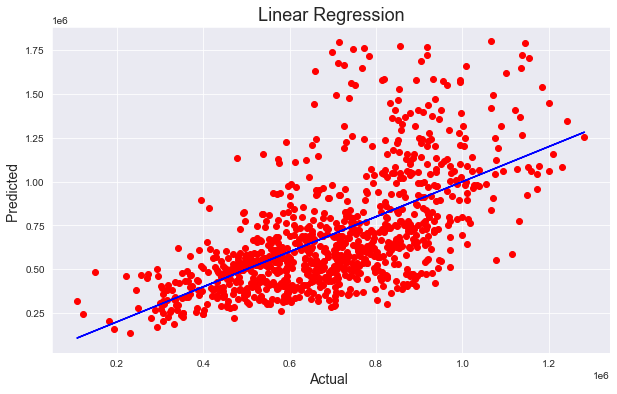

In [81]:
plt.figure(figsize=(10,6))
plt.scatter(x=pred_test,y=y_test,color='r')
plt.plot(pred_test,pred_test,color='b')
plt.xlabel('Actual ',fontsize=14)
plt.ylabel('Predicted ',fontsize=14)
plt.title("Linear Regression",fontsize=18)
plt.show()

### Regularization

In [82]:
from sklearn.linear_model import ElasticNet
# Elastic Net Model
en=ElasticNet()
en.fit(x_train,y_train)

# training score
en_score_training=en.score(x_train,y_train)
en_score_training*100

32.635247022921135

In [83]:
pred_en=en.predict(x_test) # predict test

en_cv_score=cross_val_score(en,x,y,cv=2)
en_cv_mean=en_cv_score.mean()
en_cv_mean*100

32.04305679129469

# Models:

In [84]:
#models
dtc=DecisionTreeRegressor()
knn=KNeighborsRegressor()
svm=SVR()

# Ensamble models
rf=RandomForestRegressor()
gb=GradientBoostingRegressor()
bg=BaggingRegressor()

# Bagging Regressor
ada=AdaBoostRegressor()
et=ExtraTreesRegressor()
sgd=SGDRegressor()

#neural networks
mlp=MLPRegressor()

************************************************** 

Model DecisionTreeRegressor() 
 **************************************************
Training Accuracy r2_score  0.9999961409069185 Testing Accuracy R2_score  0.7779222400593963
Training Mean_squared_Error  435475.59306569345 Testing Mean_squared_error  23975969704.121277
Training Absolute_Error  52.18978102189781 Testing Absolute Error 91347.56170212766

 DecisionTreeRegressor() Model Cross Validation 

CROSS_FOLD 2, CV_Score0.68 Train Score1.0 Testing Score0.78
CROSS_FOLD 3, CV_Score0.67 Train Score1.0 Testing Score0.78
CROSS_FOLD 4, CV_Score0.73 Train Score1.0 Testing Score0.78
CROSS_FOLD 5, CV_Score0.75 Train Score1.0 Testing Score0.78
CROSS_FOLD 6, CV_Score0.78 Train Score1.0 Testing Score0.78
CROSS_FOLD 7, CV_Score0.75 Train Score1.0 Testing Score0.78
CROSS_FOLD 8, CV_Score0.77 Train Score1.0 Testing Score0.78
CROSS_FOLD 9, CV_Score0.76 Train Score1.0 Testing Score0.78

Model Graph


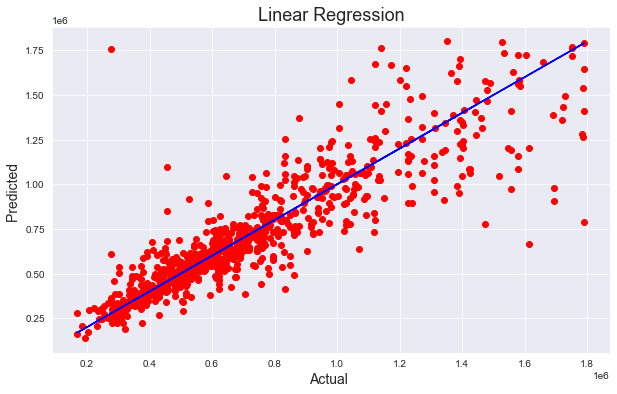

************************************************** 

Model KNeighborsRegressor() 
 **************************************************
Training Accuracy r2_score  0.7487929814107104 Testing Accuracy R2_score  0.6415280642695963
Training Mean_squared_Error  28347210883.46701 Testing Mean_squared_error  38701364212.01557
Training Absolute_Error  109229.39489051094 Testing Absolute Error 129971.28425531913

 KNeighborsRegressor() Model Cross Validation 

CROSS_FOLD 2, CV_Score0.53 Train Score0.75 Testing Score0.64
CROSS_FOLD 3, CV_Score0.52 Train Score0.75 Testing Score0.64
CROSS_FOLD 4, CV_Score0.59 Train Score0.75 Testing Score0.64
CROSS_FOLD 5, CV_Score0.59 Train Score0.75 Testing Score0.64
CROSS_FOLD 6, CV_Score0.6 Train Score0.75 Testing Score0.64
CROSS_FOLD 7, CV_Score0.6 Train Score0.75 Testing Score0.64
CROSS_FOLD 8, CV_Score0.61 Train Score0.75 Testing Score0.64
CROSS_FOLD 9, CV_Score0.59 Train Score0.75 Testing Score0.64

Model Graph


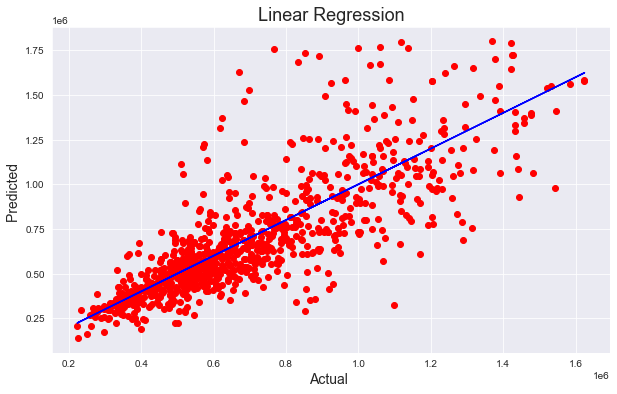

************************************************** 

Model SVR() 
 **************************************************
Training Accuracy r2_score  -0.06073879999711118 Testing Accuracy R2_score  -0.06324682907555834
Training Mean_squared_Error  119698034810.70358 Testing Mean_squared_error  114790304840.68604
Training Absolute_Error  248567.40308464487 Testing Absolute Error 242519.29237371086

 SVR() Model Cross Validation 

CROSS_FOLD 2, CV_Score-0.08 Train Score-0.06 Testing Score-0.06
CROSS_FOLD 3, CV_Score-0.09 Train Score-0.06 Testing Score-0.06
CROSS_FOLD 4, CV_Score-0.09 Train Score-0.06 Testing Score-0.06
CROSS_FOLD 5, CV_Score-0.08 Train Score-0.06 Testing Score-0.06
CROSS_FOLD 6, CV_Score-0.08 Train Score-0.06 Testing Score-0.06
CROSS_FOLD 7, CV_Score-0.09 Train Score-0.06 Testing Score-0.06
CROSS_FOLD 8, CV_Score-0.09 Train Score-0.06 Testing Score-0.06
CROSS_FOLD 9, CV_Score-0.09 Train Score-0.06 Testing Score-0.06

Model Graph


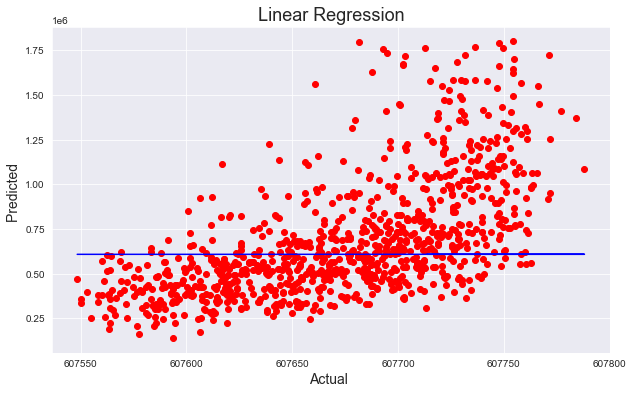

************************************************** 

Model RandomForestRegressor() 
 **************************************************
Training Accuracy r2_score  0.9833552822521074 Testing Accuracy R2_score  0.8860445343773081
Training Mean_squared_Error  1878256932.2504337 Testing Mean_squared_error  12302865411.284037
Training Absolute_Error  26519.064984358705 Testing Absolute Error 68184.23780420466

 RandomForestRegressor() Model Cross Validation 

CROSS_FOLD 2, CV_Score0.84 Train Score0.98 Testing Score0.89
CROSS_FOLD 3, CV_Score0.84 Train Score0.98 Testing Score0.89
CROSS_FOLD 4, CV_Score0.86 Train Score0.98 Testing Score0.89
CROSS_FOLD 5, CV_Score0.87 Train Score0.98 Testing Score0.89
CROSS_FOLD 6, CV_Score0.88 Train Score0.98 Testing Score0.89
CROSS_FOLD 7, CV_Score0.87 Train Score0.98 Testing Score0.89
CROSS_FOLD 8, CV_Score0.87 Train Score0.98 Testing Score0.89
CROSS_FOLD 9, CV_Score0.87 Train Score0.98 Testing Score0.89

Model Graph


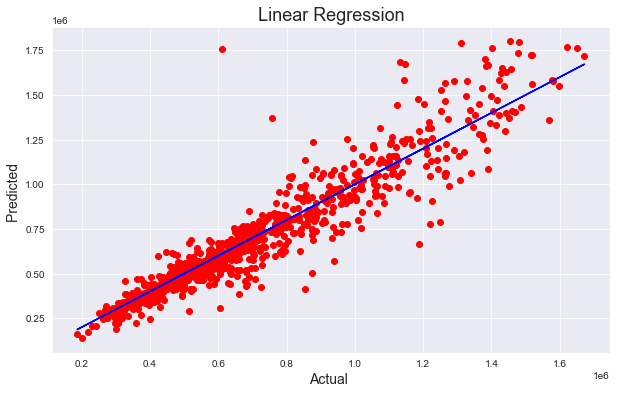

************************************************** 

Model GradientBoostingRegressor() 
 **************************************************
Training Accuracy r2_score  0.8532139694449646 Testing Accuracy R2_score  0.8215983326929646
Training Mean_squared_Error  16563926383.337227 Testing Mean_squared_error  19260609309.379803
Training Absolute_Error  90869.21160261428 Testing Absolute Error 97513.06353135273

 GradientBoostingRegressor() Model Cross Validation 

CROSS_FOLD 2, CV_Score0.8 Train Score0.85 Testing Score0.82
CROSS_FOLD 3, CV_Score0.78 Train Score0.85 Testing Score0.82
CROSS_FOLD 4, CV_Score0.81 Train Score0.85 Testing Score0.82
CROSS_FOLD 5, CV_Score0.8 Train Score0.85 Testing Score0.82
CROSS_FOLD 6, CV_Score0.81 Train Score0.85 Testing Score0.82
CROSS_FOLD 7, CV_Score0.8 Train Score0.85 Testing Score0.82
CROSS_FOLD 8, CV_Score0.8 Train Score0.85 Testing Score0.82
CROSS_FOLD 9, CV_Score0.8 Train Score0.85 Testing Score0.82

Model Graph


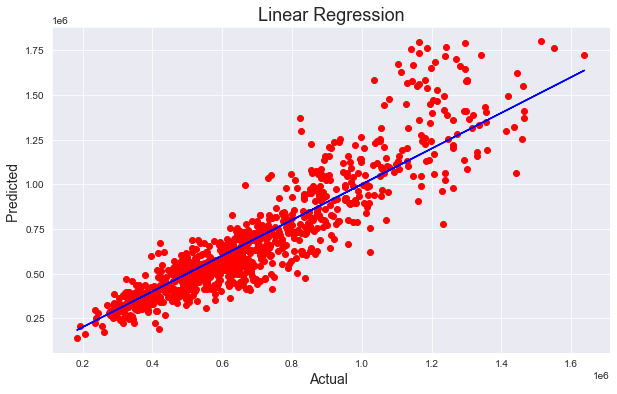

************************************************** 

Model BaggingRegressor() 
 **************************************************
Training Accuracy r2_score  0.9734121367006785 Testing Accuracy R2_score  0.8673469259584816
Training Mean_squared_Error  3000281489.4233 Testing Mean_squared_error  14321497502.625408
Training Absolute_Error  31462.53020072993 Testing Absolute Error 75118.28964539008

 BaggingRegressor() Model Cross Validation 

CROSS_FOLD 2, CV_Score0.82 Train Score0.97 Testing Score0.87
CROSS_FOLD 3, CV_Score0.82 Train Score0.97 Testing Score0.87
CROSS_FOLD 4, CV_Score0.84 Train Score0.97 Testing Score0.87
CROSS_FOLD 5, CV_Score0.85 Train Score0.97 Testing Score0.87
CROSS_FOLD 6, CV_Score0.86 Train Score0.97 Testing Score0.87
CROSS_FOLD 7, CV_Score0.86 Train Score0.97 Testing Score0.87
CROSS_FOLD 8, CV_Score0.86 Train Score0.97 Testing Score0.87
CROSS_FOLD 9, CV_Score0.86 Train Score0.97 Testing Score0.87

Model Graph


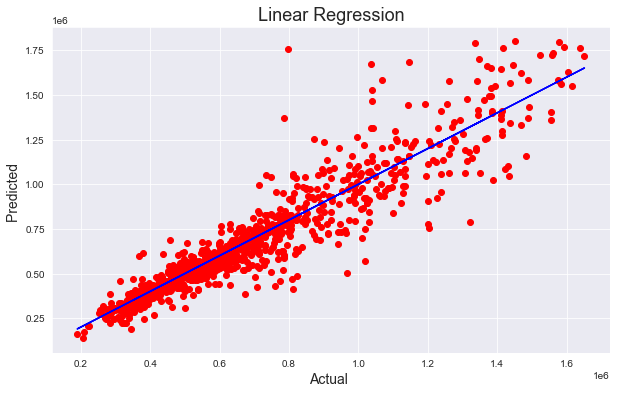

************************************************** 

Model AdaBoostRegressor() 
 **************************************************
Training Accuracy r2_score  0.5102857445509394 Testing Accuracy R2_score  0.49506236259806846
Training Mean_squared_Error  55261327290.18592 Testing Mean_squared_error  54514101277.215775
Training Absolute_Error  191082.71967505268 Testing Absolute Error 187358.34572951964

 AdaBoostRegressor() Model Cross Validation 

CROSS_FOLD 2, CV_Score0.47 Train Score0.51 Testing Score0.5
CROSS_FOLD 3, CV_Score0.39 Train Score0.51 Testing Score0.5
CROSS_FOLD 4, CV_Score0.4 Train Score0.51 Testing Score0.5
CROSS_FOLD 5, CV_Score0.44 Train Score0.51 Testing Score0.5
CROSS_FOLD 6, CV_Score0.42 Train Score0.51 Testing Score0.5
CROSS_FOLD 7, CV_Score0.43 Train Score0.51 Testing Score0.5
CROSS_FOLD 8, CV_Score0.42 Train Score0.51 Testing Score0.5
CROSS_FOLD 9, CV_Score0.41 Train Score0.51 Testing Score0.5

Model Graph


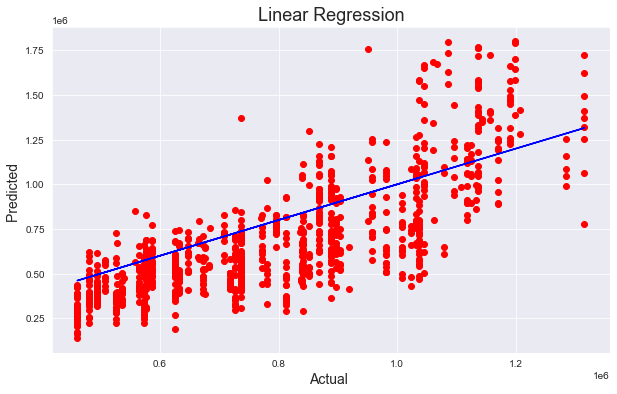

************************************************** 

Model ExtraTreesRegressor() 
 **************************************************
Training Accuracy r2_score  0.9999961409069185 Testing Accuracy R2_score  0.8823781776887821
Training Mean_squared_Error  435475.59306569345 Testing Mean_squared_error  12698692786.848852
Training Absolute_Error  52.18978102189781 Testing Absolute Error 69789.10258510639

 ExtraTreesRegressor() Model Cross Validation 

CROSS_FOLD 2, CV_Score0.82 Train Score1.0 Testing Score0.88
CROSS_FOLD 3, CV_Score0.82 Train Score1.0 Testing Score0.88
CROSS_FOLD 4, CV_Score0.86 Train Score1.0 Testing Score0.88
CROSS_FOLD 5, CV_Score0.86 Train Score1.0 Testing Score0.88
CROSS_FOLD 6, CV_Score0.87 Train Score1.0 Testing Score0.88
CROSS_FOLD 7, CV_Score0.87 Train Score1.0 Testing Score0.88
CROSS_FOLD 8, CV_Score0.87 Train Score1.0 Testing Score0.88
CROSS_FOLD 9, CV_Score0.87 Train Score1.0 Testing Score0.88

Model Graph


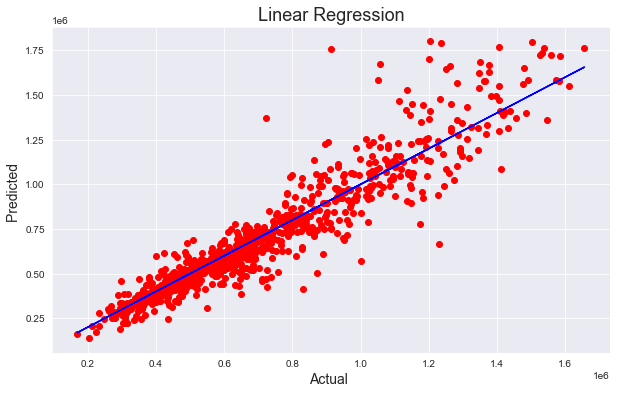

************************************************** 

Model SGDRegressor() 
 **************************************************
Training Accuracy r2_score  0.3818770385686614 Testing Accuracy R2_score  0.38469358063600945
Training Mean_squared_Error  69751482414.80849 Testing Mean_squared_error  66429740976.170044
Training Absolute_Error  195969.59366886131 Testing Absolute Error 190123.03563702392

 SGDRegressor() Model Cross Validation 

CROSS_FOLD 2, CV_Score0.38 Train Score0.38 Testing Score0.38
CROSS_FOLD 3, CV_Score0.33 Train Score0.38 Testing Score0.38
CROSS_FOLD 4, CV_Score0.36 Train Score0.38 Testing Score0.38
CROSS_FOLD 5, CV_Score0.36 Train Score0.38 Testing Score0.38
CROSS_FOLD 6, CV_Score0.35 Train Score0.38 Testing Score0.38
CROSS_FOLD 7, CV_Score0.35 Train Score0.38 Testing Score0.38
CROSS_FOLD 8, CV_Score0.36 Train Score0.38 Testing Score0.38
CROSS_FOLD 9, CV_Score0.36 Train Score0.38 Testing Score0.38

Model Graph


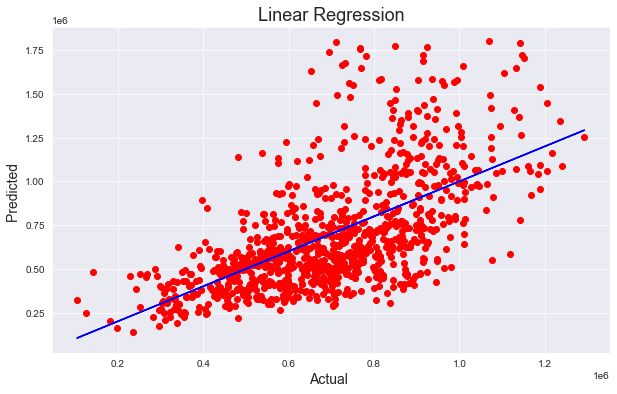

************************************************** 

Model MLPRegressor() 
 **************************************************
Training Accuracy r2_score  -4.204740686493271 Testing Accuracy R2_score  -4.392662037637452
Training Mean_squared_Error  587323883951.6886 Testing Mean_squared_error  582202835950.5298
Training Absolute_Error  689019.9418788457 Testing Absolute Error 688842.042816311

 MLPRegressor() Model Cross Validation 

CROSS_FOLD 2, CV_Score-4.28 Train Score-4.2 Testing Score-4.39
CROSS_FOLD 3, CV_Score-4.31 Train Score-4.2 Testing Score-4.39
CROSS_FOLD 4, CV_Score-4.32 Train Score-4.2 Testing Score-4.39
CROSS_FOLD 5, CV_Score-4.34 Train Score-4.2 Testing Score-4.39
CROSS_FOLD 6, CV_Score-4.33 Train Score-4.2 Testing Score-4.39
CROSS_FOLD 7, CV_Score-4.41 Train Score-4.2 Testing Score-4.39
CROSS_FOLD 8, CV_Score-4.4 Train Score-4.2 Testing Score-4.39
CROSS_FOLD 9, CV_Score-4.45 Train Score-4.2 Testing Score-4.39

Model Graph


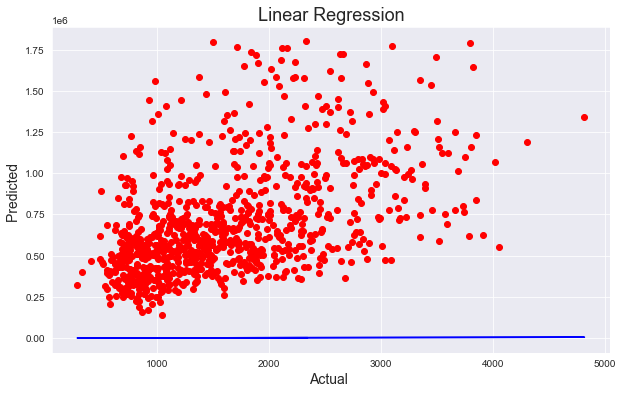

In [85]:
models=[dtc,knn,svm,rf,gb,bg,ada,et,sgd,mlp]

for m in models:
    m.fit(x_train,y_train)
    m.score(x_train,y_train)
    
    #predict
    pred_train=m.predict(x_train)
    pred_test=m.predict(x_test)
    
    print("*****"*10,"\n", )
    print("Model",m,"\n","*****"*10)
    print("Training Accuracy r2_score ",r2_score(y_train,pred_train),"Testing Accuracy R2_score ",r2_score(y_test,pred_test))
    print("Training Mean_squared_Error ",mean_squared_error(y_train,pred_train),"Testing Mean_squared_error ",mean_squared_error(y_test,pred_test))
    print("Training Absolute_Error ",mean_absolute_error(y_train,pred_train),"Testing Absolute Error",mean_absolute_error(y_test,pred_test))
    print("\n"*1,m,"Model Cross Validation","\n")
    
    #training accuracy.
    train_accuracy=r2_score(y_train,pred_train)
    test_accuracy=r2_score(y_test,pred_test)

    for i in range(2,10):
        cv_score=cross_val_score(m,x,y,cv=i)
        cv_mean=cv_score.mean()

        print(f"CROSS_FOLD {i}, CV_Score{round(cv_mean,2)} Train Score{round(train_accuracy,2)} Testing Score{round(test_accuracy,2)}")
        
    print("\nModel Graph")
    
    plt.figure(figsize=(10,6))
    plt.scatter(x=pred_test,y=y_test,color='r')
    plt.plot(pred_test,pred_test,color='b')
    plt.xlabel('Actual ',fontsize=14)
    plt.ylabel('Predicted ',fontsize=14)
    plt.title("Linear Regression",fontsize=18)
    plt.show()
    

## Hyper-Parameter With Models

Extra Trees Regressor and Random Forest, Bagging Regressor are working very close

we selected them due the following reasons: 
- R2 Score is better for the model.
- CV Score better for these model they are nearer to training score.
- "MSE" and "MAE" are less on compare to other models.(They are close to the mean)

# Extra Trees Regressor

In [86]:
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import ExtraTreesRegressor
etr=ExtraTreesRegressor()

parameters={'n_estimators':[100,180,200],
            'criterion':['squared_error', 'absolute_error'],
            'max_features':['sqrt', 'log2','None',1.0]}

gsv=GridSearchCV(etr,parameters,cv=6)
gsv.fit(x_train,y_train)

print("Best Parameter ",gsv.best_params_,"Best Score ",gsv.best_score_)

Best Parameter  {'criterion': 'absolute_error', 'max_features': 1.0, 'n_estimators': 200} Best Score  0.8658588825142939


In [94]:
from sklearn.ensemble import ExtraTreesRegressor
etr=ExtraTreesRegressor(criterion= 'absolute_error',n_estimators= 200,max_features= 1.0, n_jobs=2,
                        random_state=98,max_depth=2500,min_samples_split=2,min_impurity_decrease=0.00001)

#training score
etr.fit(x_train,y_train)
etr_score=etr.score(x_train,y_train)

#predict
pred_train1=etr.predict(x_train)
pred_test1=etr.predict(x_test)

#result
print("Training Score",etr_score)
print("Training Accuracy r2_score ",r2_score(y_train,pred_train1),"Testing Accuracy R2_score ",r2_score(y_test,pred_test1))
print("Training Mean_squared_Error ",mean_squared_error(y_train,pred_train1),"Testing Mean_squared_error ",mean_squared_error(y_test,pred_test1))
print("Training Absolute_Error ",mean_absolute_error(y_train,pred_train1),"Testing Absolute Error",mean_absolute_error(y_test,pred_test1)) 

Training Score 0.9998415543291546
Training Accuracy r2_score  0.9998415543291546 Testing Accuracy R2_score  0.8859330307410067
Training Mean_squared_Error  17879647.11436941 Testing Mean_squared_error  12314903572.181269
Training Absolute_Error  1481.5264781021897 Testing Absolute Error 67509.89688829788


### Model Cross Validation Score

In [95]:
from sklearn.model_selection import cross_val_score

#training accuracy.
train_accuracy=r2_score(y_train,pred_train1)
test_accuracy=r2_score(y_test,pred_test1)

for i in range(2,10):
    etr_cv_score=cross_val_score(etr,x,y,cv=i)
    cv_mean=etr_cv_score.mean()

    print(f"At CROSS_FOLD {i}, The Cross_Val_Score {cv_mean} ,Training Score is {train_accuracy},Testing Score{test_accuracy}")

At CROSS_FOLD 2, The Cross_Val_Score 0.8293254200663513 ,Training Score is 0.9998415543291546,Testing Score0.8859330307410067
At CROSS_FOLD 3, The Cross_Val_Score 0.8250041035674599 ,Training Score is 0.9998415543291546,Testing Score0.8859330307410067
At CROSS_FOLD 4, The Cross_Val_Score 0.8649493800250416 ,Training Score is 0.9998415543291546,Testing Score0.8859330307410067
At CROSS_FOLD 5, The Cross_Val_Score 0.8706605064521161 ,Training Score is 0.9998415543291546,Testing Score0.8859330307410067
At CROSS_FOLD 6, The Cross_Val_Score 0.878129327578288 ,Training Score is 0.9998415543291546,Testing Score0.8859330307410067
At CROSS_FOLD 7, The Cross_Val_Score 0.8736581247052625 ,Training Score is 0.9998415543291546,Testing Score0.8859330307410067
At CROSS_FOLD 8, The Cross_Val_Score 0.8789565891845699 ,Training Score is 0.9998415543291546,Testing Score0.8859330307410067
At CROSS_FOLD 9, The Cross_Val_Score 0.8781479176066078 ,Training Score is 0.9998415543291546,Testing Score0.8859330307

### Cross Validation  

In [96]:
# pred training for Extra Trees
train_accuracy=r2_score(y_train,pred_train1)
test_accuracy=r2_score(y_test,pred_test1)

#cross val with Extra Trees
etr_cv_score=cross_val_score(etr,x,y,cv=8) 
etr_mean=etr_cv_score.mean() #mean value

print("Cv_score of Model is ",etr_mean," The Training Score is", train_accuracy,"Testing Score Stands " ,test_accuracy)

Cv_score of Model is  0.8789565891845699  The Training Score is 0.9998415543291546 Testing Score Stands  0.8859330307410067


# Graph 

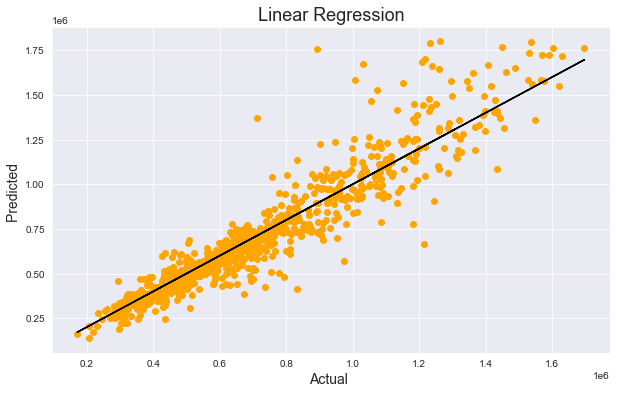

In [97]:
plt.figure(figsize=(10,6))
plt.scatter(x=pred_test1,y=y_test,color='orange')
plt.plot(pred_test1,pred_test1,color='black')
plt.xlabel('Actual ',fontsize=14)
plt.ylabel('Predicted ',fontsize=14)
plt.title("Linear Regression",fontsize=18)
plt.show()

In [102]:
from sklearn.linear_model import ElasticNet

parameters={'alpha':[.0001,.001,.01,.1,1.0],'random_state':list(range(0,10)),'max_iter':[1000,3000,5000],'tol':[1e-4,1e-5,1e-6],
           'random_state':[98],'selection':['cyclic', 'random']}

ls=ElasticNet()
clf=GridSearchCV(ls,parameters)
clf.fit(x_train,y_train)


print("Best Parameter ",clf.best_params_,"Best Score ",clf.best_score_)

Best Parameter  {'alpha': 0.01, 'max_iter': 1000, 'random_state': 98, 'selection': 'cyclic', 'tol': 1e-06} Best Score  0.36675091745280997


In [104]:
# final training
ls=ElasticNet(alpha=0.01,random_state=98,max_iter=1000,selection='cyclic',tol=1e-06)
ls.fit(x_train,y_train)

#score
ls_score_training=ls.score(x_train,y_train) 
ls_score_training*100

38.22012877955143

In [106]:
pred_en=ls.predict(x_test) # predict test

cv_score=cross_val_score(etr,x,y,cv=8)
cv_mean=cv_score.mean()
cv_mean*100

87.89565891845699

In [107]:
lss = r2_score(y_test,pred_en)
lss*100

38.50142067552079

In [108]:
cv_score=cross_val_score(etr,x,y,cv=8)
cv_mean=cv_score.mean()
cv_mean*100

87.89565891845699

# Random Forest Regressor

In [110]:
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestRegressor
rfr=RandomForestRegressor()

parameters={'n_estimators':[200],
            'criterion':['squared_error', 'absolute_error','poisson'],
            'max_features':['sqrt', 'log2','None',1.0],
           'random_state':[98],
           'ccp_alpha':[0.0,0.01]}

gsv=GridSearchCV(rfr,parameters,cv=6)
gsv.fit(x_train,y_train)

print("Best Parameter ",gsv.best_params_,"Best Score ",gsv.best_score_)

Best Parameter  {'ccp_alpha': 0.0, 'criterion': 'squared_error', 'max_features': 1.0, 'n_estimators': 200, 'random_state': 98} Best Score  0.86101912104336


In [140]:
from sklearn.ensemble import RandomForestRegressor

rfr=RandomForestRegressor(criterion= 'squared_error',n_estimators= 100,max_features= 1.0,max_depth=200,
                        random_state=0,min_samples_split=2,min_impurity_decrease=0.000001,max_leaf_nodes=None)

#training score
rfr.fit(x_train,y_train)
rfr.score(x_train,y_train)

#predict
pred_train2=rfr.predict(x_train)
pred_test2=rfr.predict(x_test)

#result

print("Training Accuracy r2_score ",r2_score(y_train,pred_train2),"Testing Accuracy R2_score ",r2_score(y_test,pred_test2))
print("Training Mean_squared_Error ",mean_squared_error(y_train,pred_train2),"Testing Mean_squared_error ",mean_squared_error(y_test,pred_test2))
print("Training Absolute_Error ",mean_absolute_error(y_train,pred_train2),"Testing Absolute Error",mean_absolute_error(y_test,pred_test2)) 

Training Accuracy r2_score  0.9823138575616585 Testing Accuracy R2_score  0.8874794820137715
Training Mean_squared_Error  1995775485.2159984 Testing Mean_squared_error  12147945526.158905
Training Absolute_Error  26930.725616853495 Testing Absolute Error 68380.40454964539


In [141]:
from sklearn.model_selection import cross_val_score

#training accuracy.
train_accuracy=r2_score(y_train,pred_train2)
test_accuracy=r2_score(y_test,pred_test2)

for i in range(2,10):
    cv_score=cross_val_score(rfr,x,y,cv=i)
    cv_mean=cv_score.mean()

    print(f"At CROSS_FOLD {i}, The Cross_Val_Score {cv_mean} ,Training Score is {train_accuracy},Testing Score{test_accuracy}")

At CROSS_FOLD 2, The Cross_Val_Score 0.8370554729901425 ,Training Score is 0.9823138575616585,Testing Score0.8874794820137715
At CROSS_FOLD 3, The Cross_Val_Score 0.836866861505846 ,Training Score is 0.9823138575616585,Testing Score0.8874794820137715
At CROSS_FOLD 4, The Cross_Val_Score 0.8599065651339809 ,Training Score is 0.9823138575616585,Testing Score0.8874794820137715
At CROSS_FOLD 5, The Cross_Val_Score 0.8659408381095719 ,Training Score is 0.9823138575616585,Testing Score0.8874794820137715
At CROSS_FOLD 6, The Cross_Val_Score 0.8744741475368697 ,Training Score is 0.9823138575616585,Testing Score0.8874794820137715
At CROSS_FOLD 7, The Cross_Val_Score 0.8723989060639339 ,Training Score is 0.9823138575616585,Testing Score0.8874794820137715
At CROSS_FOLD 8, The Cross_Val_Score 0.8734610992628171 ,Training Score is 0.9823138575616585,Testing Score0.8874794820137715
At CROSS_FOLD 9, The Cross_Val_Score 0.8722242928503705 ,Training Score is 0.9823138575616585,Testing Score0.8874794820

In [144]:
# pred training for Extra Trees
train_accuracy=r2_score(y_train,pred_train2)
test_accuracy=r2_score(y_test,pred_test2)

#cross val with Extra Trees
cv_score=cross_val_score(rfr,x,y,cv=6) 
cv_mean=cv_score.mean() #mean value

print("Cv_score of Model is ",cv_mean," The Training Score is", train_accuracy,"Testing Score Stands " ,test_accuracy)

Cv_score of Model is  0.8744741475368697  The Training Score is 0.9823138575616585 Testing Score Stands  0.8874794820137715


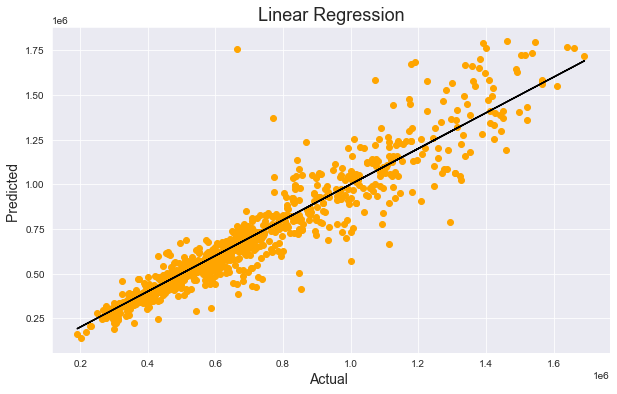

In [145]:
plt.figure(figsize=(10,6))
plt.scatter(x=pred_test2,y=y_test,color='orange')
plt.plot(pred_test2,pred_test2,color='black')
plt.xlabel('Actual ',fontsize=14)
plt.ylabel('Predicted ',fontsize=14)
plt.title("Linear Regression",fontsize=18)
plt.show()

In [146]:
from sklearn.linear_model import ElasticNet

parameters={'alpha':[.0001,.001,.01,.1,1.0],'random_state':list(range(0,10)),'max_iter':[1000,3000,5000],'tol':[1e-4,1e-5,1e-6],
           'random_state':[98],'selection':['cyclic', 'random']}

ls=ElasticNet()
clf=GridSearchCV(ls,parameters)
clf.fit(x_train,y_train)


print("Best Parameter ",clf.best_params_,"Best Score ",clf.best_score_)

Best Parameter  {'alpha': 0.01, 'max_iter': 1000, 'random_state': 98, 'selection': 'cyclic', 'tol': 1e-06} Best Score  0.36675091745280997


In [147]:
# final training
ls=ElasticNet(alpha=0.01,random_state=98,max_iter=1000,selection='cyclic',tol=1e-06)
ls.fit(x_train,y_train)

#score
ls_score_training=ls.score(x_train,y_train) 
ls_score_training*100

38.22012877955143

In [148]:
pred_en=ls.predict(x_test) # predict test

cv_score=cross_val_score(rfr,x,y,cv=6)
cv_mean=cv_score.mean()
cv_mean*100

87.44741475368697

In [150]:
lss = r2_score(y_test,pred_en)
lss*100

38.50142067552079

In [151]:
cv_score=cross_val_score(rfr,x,y,cv=6)
cv_mean=cv_score.mean()
cv_mean*100

87.44741475368697

#### MODEL Extra Trees Shows accuracy and CV_Score both around 88%, Shows our model is performing extremly well....

# Saving Best Model

In [152]:
import pickle
filename='cars.pkl'
pickle.dump(etr,open(filename,'wb'))

In [153]:
# Opening back
import pickle
model =pickle.load(open('cars.pkl','rb'))
result=model.score(x_test,y_test)
print(result*100)

88.59330307410067


In [154]:
Final_Result=pd.DataFrame([model.predict(x_test)[:],y_test[:]],index=["Predicted","Original"])

Final_Result

0          1         2            3          4         5    \
Predicted  359554.25  797704.75  388308.5  1014087.375   994614.5  802780.0   
Original   470299.00  820899.00  390399.0   915999.000  1082499.0  826699.0   

                6         7          8         9          10         11   \
Predicted  997324.0  540257.0  534513.25  779505.5  508721.25  1454861.5   
Original   971799.0  545149.0  488399.00  504099.0  486999.00  1316099.0   

                  12        13        14        15        16        17   \
Predicted   974811.25  275016.0  918495.5  810424.5  664013.0  446652.0   
Original   1053599.00  253799.0  800599.0  610299.0  636199.0  525599.0   

                 18          19        20        21        22        23   \
Predicted  390710.75  1434783.25  502810.5  613990.5  746399.0  277340.5   
Original   339999.00  1399799.00  411099.0  601899.0  769399.0  270299.0   

                  24         25        26        27        28        29   \
Predicted  1548618.75  511398.75  578285.5  709299.0  678183.5  711343.5   
Original   1360899.00  438099.00  506099.0  709299.0  739999.0  724899.0   

                30        31         32        33         34        35   \
Predicted  572771.5  470820.5  1538069.0  635773.5  548742.75  495775.5   
Original   609599.0  494099.0  1793999.0  631399.0  555549.00  472599.0   

                36        37          38         39        40         41   \
Predicted  270612.0  844103.5  690800.375  627651.75  674228.5  1195061.0   
Original   249399.0  905699.0  486599.000  648699.00  653199.0  1023999.0   

                 42        43         44         45        46         47   \
Predicted  834940.75  354531.0  1256384.5  903387.75  487231.0  638024.75   
Original   893999.00  363099.0  1101399.0  714699.00  379399.0  779999.00   

                 48        49          50         51          52         53   \
Predicted  755658.75  723340.0   876611.75  748055.75  324741.375  533357.25   
Original   728199.00  688499.0  1055399.00  826499.00  299399.000  533999.00   

                54         55         56        57         58        59   \
Predicted  743624.0  828167.75  1081333.0  524757.0  1134573.5  889748.0   
Original   693899.0  828499.00  1070599.0  486199.0   897599.0  895999.0   

                60        61         62         63        64         65   \
Predicted  696747.0  538694.5  654778.25  1105636.5  868582.5  603637.75   
Original   630899.0  562399.0  593899.00   935399.0  774099.0  609399.00   

                  66         67          68         69        70         71   \
Predicted  1116348.25  431273.75  1568267.75  922599.25  688608.5  511178.25   
Original   1160399.00  493899.00  1722099.00  893699.00  640599.0  461999.00   

                 72         73        74         75         76         77   \
Predicted  302508.75  931912.75  458449.5  459913.25  1295153.5  646073.25   
Original   280599.00  755099.00  455999.0  462099.00  1575999.0  663399.00   

                  78          79        80        81         82         83   \
Predicted  384865.625  355212.125  554775.5  220207.5  694159.75  691349.75   
Original   379599.000  387899.000  495799.0  171499.0  456599.00  692199.00   

                 84         85        86         87        88        89   \
Predicted  1022004.0  466927.25  422474.0  558641.75  836849.0  702871.5   
Original   1046699.0  453999.00  395799.0  502199.00  805899.0  703699.0   

                  90        91         92         93        94        95   \
Predicted  422450.375  504186.0  421502.25  511970.75  290887.0  771199.0   
Original   402599.000  462999.0  408899.00  304999.00  299899.0  777599.0   

                96        97          98         99        100        101  \
Predicted  523145.0  705447.0  1117028.75  790701.75  558005.5  517968.75   
Original   527799.0  716999.0  1046099.00  725599.00  521799.0  381499.00   

                 102       103       104       105       106        10